## **Projet - Réalisez un traitement dans un environnement Big Data sur le Cloud**



## Configuration PySpark sur le Cloud (AWS)

#### Choix du prestataire **cloud** : AWS

Amazon Web Services (AWS) a été retenu pour ce projet pour plusieurs raisons :  
1. AWS permet de louer de la puissance de calcul **à la demande**, ce qui offre une grande flexibilité en cas d’augmentation du volume de données.  
2. Cela réduit considérablement les coûts par rapport à une location de serveurs pour une durée fixe (par exemple, un an).  

#### Choix de la solution technique : EMR

Deux options principales étaient envisageables pour configurer un cluster de calcul distribué sur AWS :  

1. **Solution IAAS (Infrastructure as a Service)**  
   - Serveurs vierges (instances EC2) nécessitant l'installation et la configuration manuelle de Spark, Python, TensorFlow, etc.  
   - Avantages : liberté totale et reproductibilité d’une solution locale.  
   - Inconvénients : chronophage et sujet à des problèmes techniques, notamment de compatibilité ou de mise à jour.  

2. **Solution PAAS (Platform as a Service)**  
   - Utilisation du service **EMR (Elastic MapReduce)**, où Spark, TensorFlow et JupyterHub sont déjà préinstallés et configurés.  
   - Avantages : rapide à mettre en place, stable, sécurisé, évolutif et facile à cloner.  
   - Inconvénients : liberté légèrement restreinte quant aux versions des packages.  

Compte tenu des avantages de la solution **PAAS**, j’ai choisi d’utiliser **EMR** pour ce projet.

#### Choix du stockage : Amazon S3

Les données seront stockées sur **Amazon S3**, une solution de stockage flexible et illimitée :  
1. Les données restent accessibles, même après la résiliation des serveurs EC2 pour réduire les coûts.  
2. L'espace disque est indépendant des instances EC2, éliminant les risques de saturation.  
3. L'accès aux données est rapide grâce à l'intégration avec d'autres services AWS, en particulier si les serveurs EC2 et S3 sont dans la même région.  

Les données sont accessibles via des chemins au format **s3://...**.

### Étape 1 : Création d'un utilisateur IAM

Dans la console AWS, accédez au service **IAM** pour créer un nouvel utilisateur :  
- Naviguez vers **IAM** → **Utilisateurs** → **Créer un utilisateur**.  

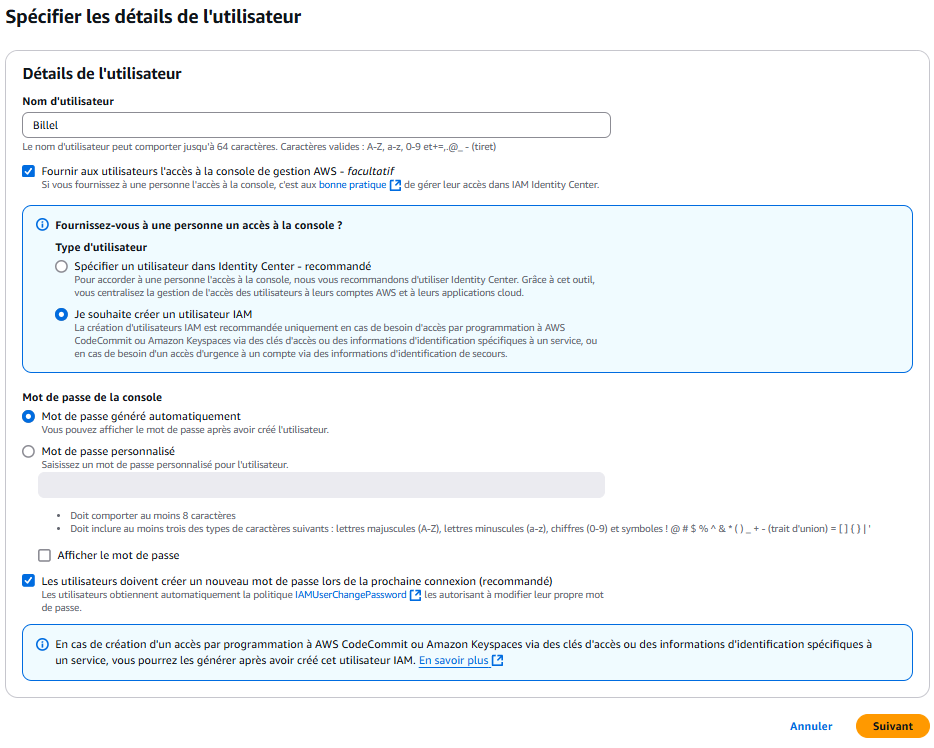

Ensuite 

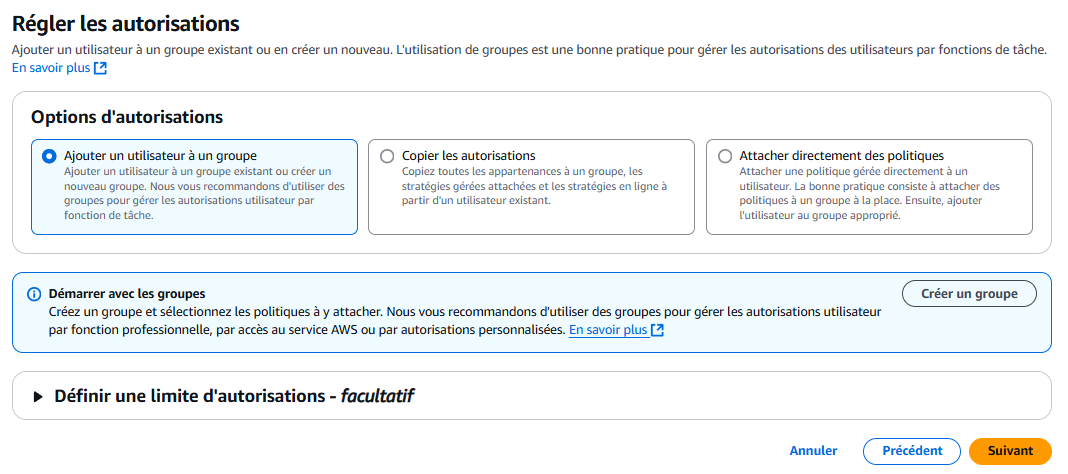

Ensuite 

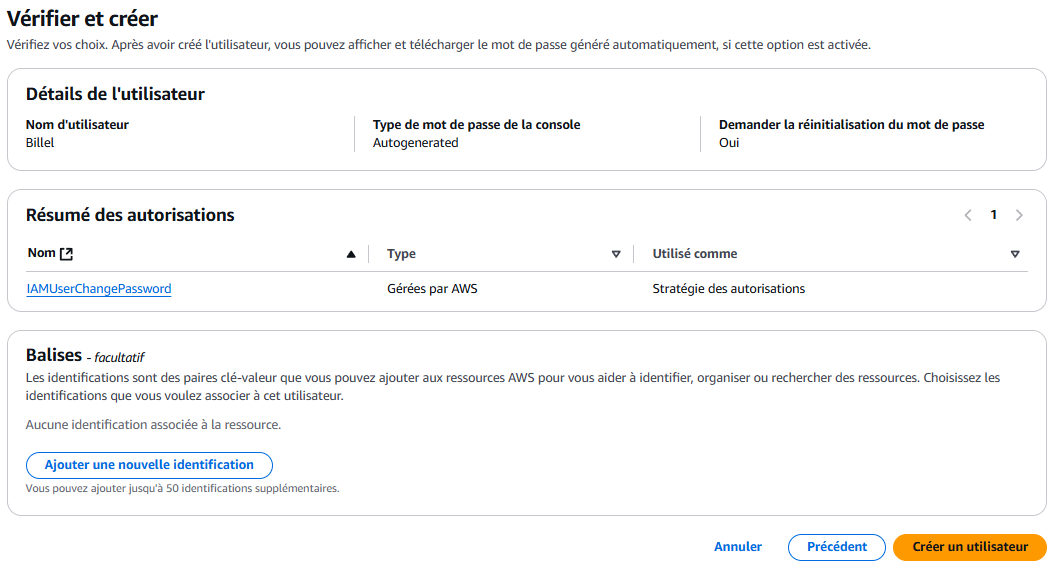

Finalement

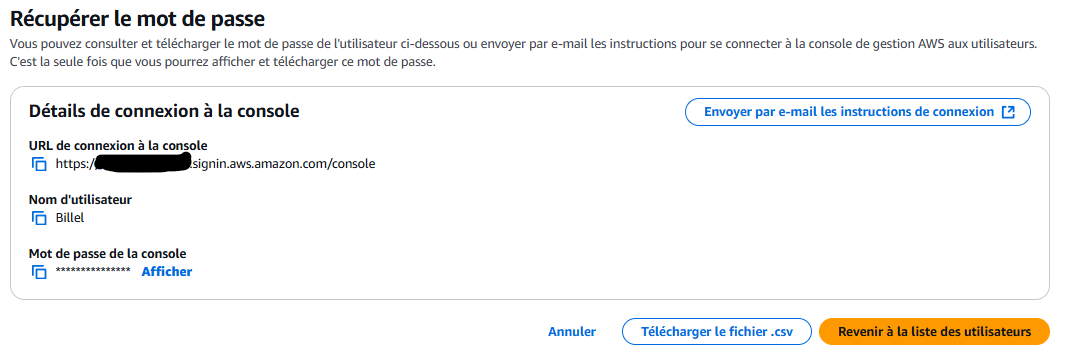

et 

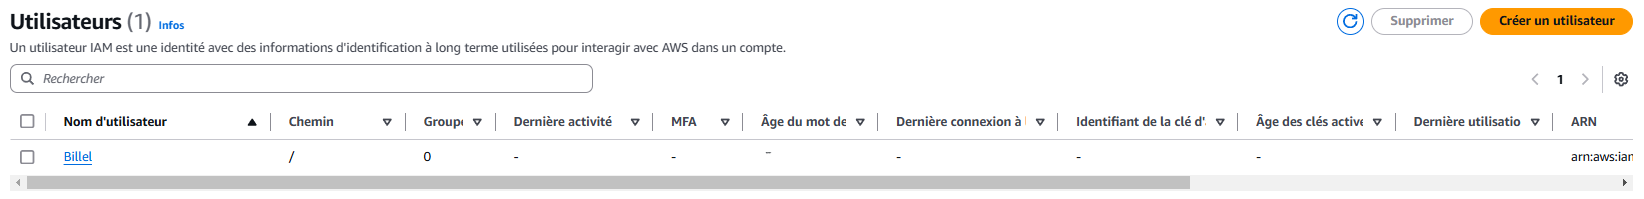

### Téléchargement du fichier CSV

Téléchargez le fichier CSV pour récupérer les informations suivantes :  
- **Nom d'utilisateur**  
- **Mot de passe**  
- **URL de connexion à la console**  

### Étape 2 : Ajout des autorisations pour l'utilisateur

1. Accordez à l'utilisateur toutes les autorisations nécessaires pour accéder à **S3** :  
   - Naviguez vers **IAM** → **Utilisateurs** → Sélectionnez le **Nom de l'utilisateur** → **Ajouter des autorisations** → **Créer une politique en ligne** → Cliquez sur l'onglet **JSON**.  

2. Le contenu JSON de la politique doit être structuré comme suit : 

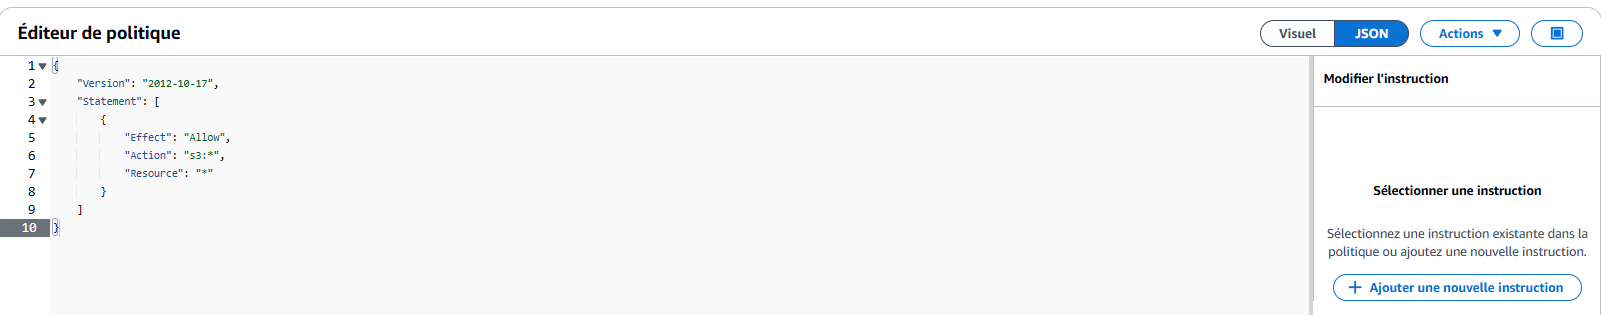

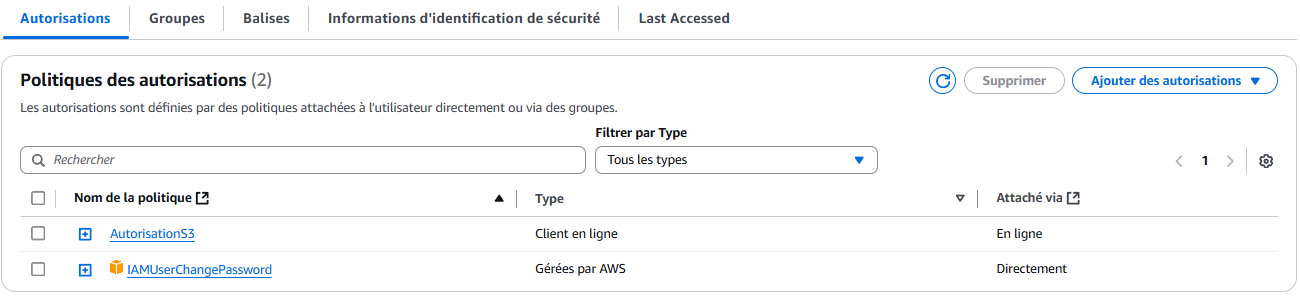

### Étape 3 : Créer une paire de clés d'accès pour l'utilisateur

1. Accéder à **IAM** dans la console AWS.  
2. Aller dans l'onglet **Utilisateurs** et sélectionner l'utilisateur concerné.  
3. Cliquer sur **Créer une clé d'accès** dans la section **Informations d'identification de sécurité**.  


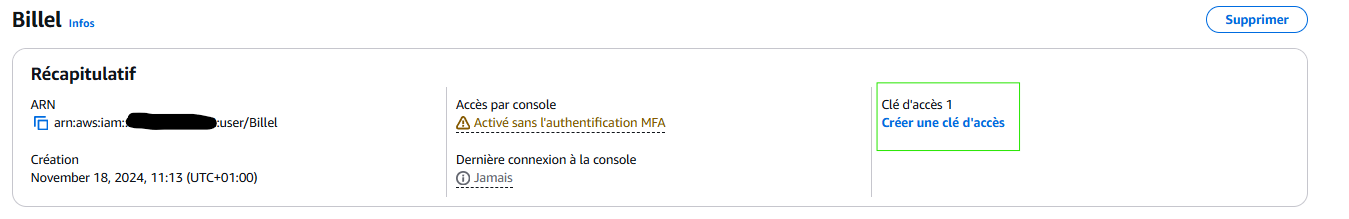



#### Configurer la clé d'accès :  
1. Choisir **Interface de ligne de commande (CLI)** comme méthode d'accès.  
2. Cliquer sur **Confirmation**, puis sur **Suivant**.  

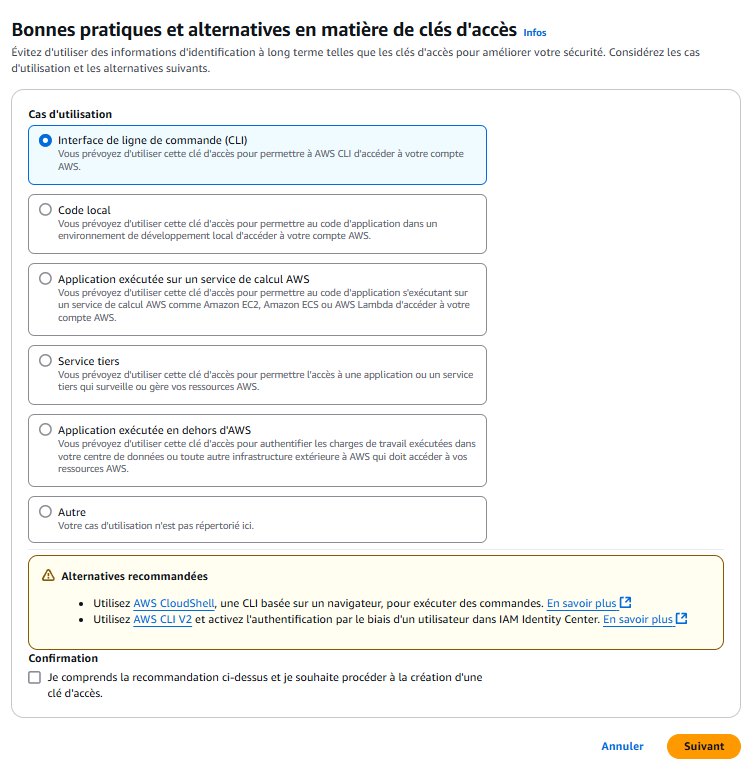


#### Télécharger les informations :  
1. Une fois la clé générée, télécharger le fichier CSV contenant :  
   - La **Key ID** (Identifiant de la clé).  
   - La **Secret Access Key** (Clé secrète d'accès).  

> **Important :** Conserver ce fichier en lieu sûr, car la clé secrète ne pourra pas être affichée à nouveau après cette étape.

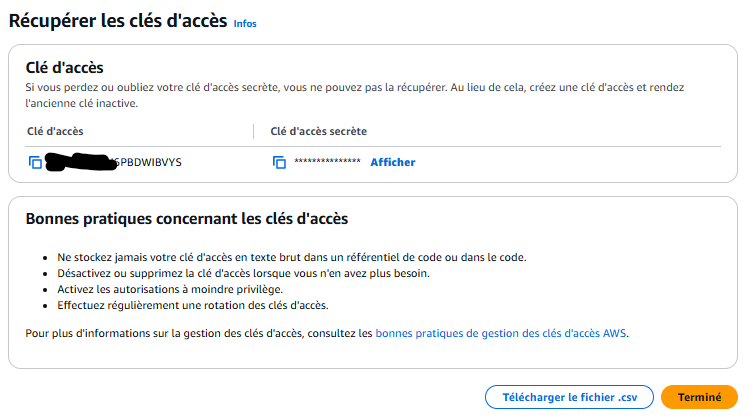

### Étape 4 : Installer et configurer le package AWS CLI

Installer l'interface en ligne de commande **AWS CLI**, qui permet d’interagir avec l'API d'AWS pour gérer les services et ressources.  

In [ ]:
!pip install awscli

Defaulting to user installation because normal site-packages is not writeable


#### Vérifier la disponibilité de la commande AWS CLI

Exécuter la commande suivante pour vérifier si AWS CLI est bien installé et accessible depuis le terminal :  


In [34]:
!which aws


/usr/bin/aws


### Configurer AWS CLI avec la clé d'accès

Utiliser la commande suivante pour configurer AWS CLI avec la clé d'accès :  
```bash
aws configure
```

Pendant la configuration :  
- Fournir la clé d'accès et la clé secrète.  
- Choisir la région `eu-west-3` pour sélectionner les serveurs situés à Paris.  
- Laisser le format de sortie par défaut (généralement JSON).


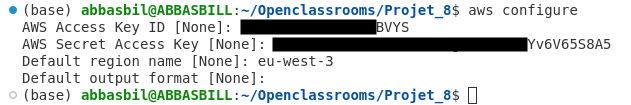

In [36]:
!aws s3 ls

### Étape 5 : Créer un bucket S3

Pour créer un bucket S3 via AWS CLI, exécuter cette commande :

In [37]:
!aws s3 mb s3://p8-data-billel

make_bucket: p8-data-billel


On vérifie la présence du bucket S3:

In [39]:
!aws s3 ls

2024-11-18 14:13:32 p8-data-billel


### Étape #6 : Ajouter le dossier contenant les images au bucket S3

1. Se positionner dans le répertoire local où se trouvent les images, par exemple :  
   ```
   \\wsl.localhost\Ubuntu\home\abbasbil\Openclassrooms\Projet_8\data\Test1
   ```
2. Ouvrir un terminal ou une interface CLI dans ce dossier.
3. Utiliser la commande `aws s3 sync` pour synchroniser le contenu du répertoire local avec le bucket S3 :  
   ```bash
   aws s3 sync . s3://p8-data-billel/Test
   ```

**Résultats:**

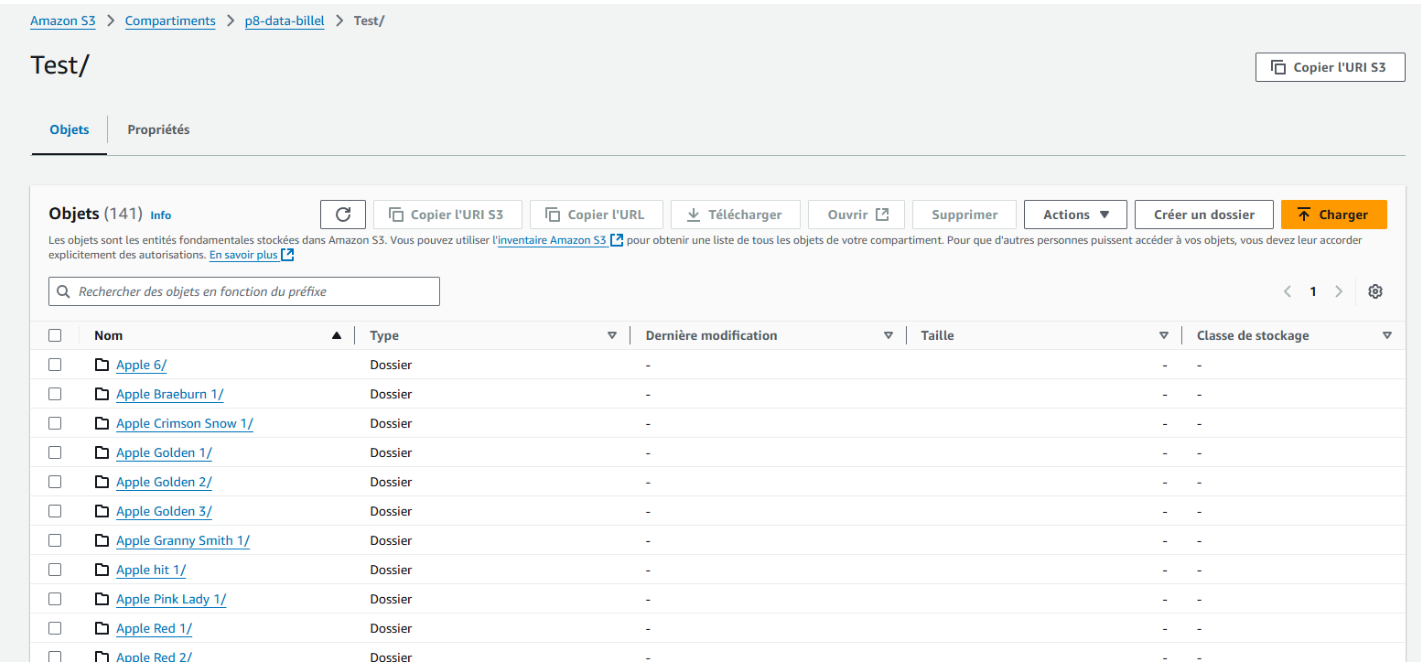

### Étape 7 : Créer une paire de clés SSH
- **Utilité des clés SSH** :  
  Ces clés sont essentielles pour établir une connexion sécurisée avec les machines EC2 qui constituent le cluster EMR.

1. Accéder à la console AWS et se rendre dans la section EC2 :
   ```
   EC2 -> Paires de clés
   ```
2. Cliquer sur **Créer une paire de clés**.
3. Suivre les étapes pour générer une nouvelle paire de clés.

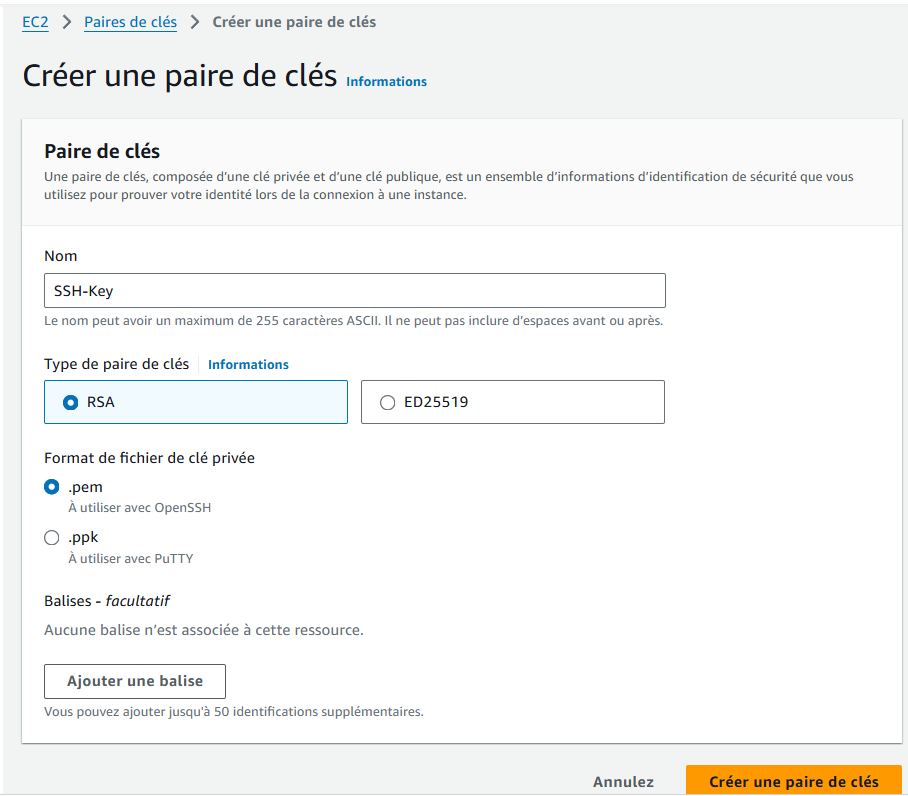

On a deux Type de paire de clés :

- Sélectionner RSA (Recommandé pour une compatibilité maximale).

- Choisir .pem (Recommandé pour une compatibilité avec OpenSSH, utilisé sous Linux).

### Étape 8: Ajouter la clé SSH dans le répertoire `\home\NomUtilisateur`

Pour établir une connexion sécurisée avec le cluster, il est nécessaire de placer le fichier de clé SSH (`SSH-key.pem`) dans le répertoire approprié :

1. **Emplacement recommandé** :  
   Déposer le fichier `SSH-key.pem` dans le répertoire suivant :  
   ```
   /home/abbasbil
   ```

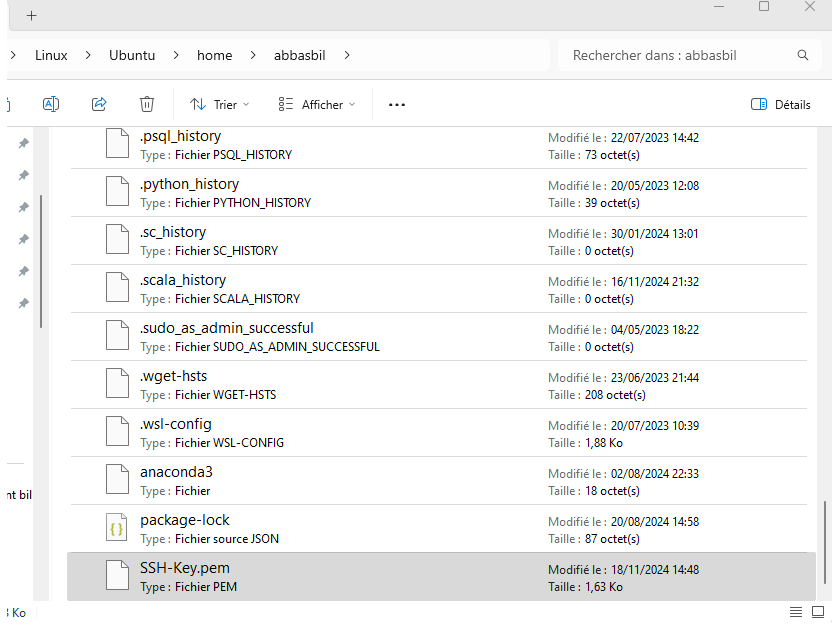

### Étape 9 : Restreindre les permissions sur la clé SSH

Pour éviter une erreur de permissions lors de la connexion SSH, il est nécessaire de sécuriser l'accès au fichier de clé privée.

#### Pourquoi ?
Sans cette étape, vous risquez de rencontrer l'erreur suivante :
```
Permissions 0644 for '/home/abbasbil/SSH-Key.pem' are too open. It is required that your private key files are NOT accessible by others.
```

#### Étapes à suivre :
1. **Restreindre les permissions de la clé privée** :  
   Exécuter la commande suivante dans un terminal pour attribuer les permissions correctes :
   ```bash
   chmod 600 /home/abbasbil/SSH-Key.pem
   ```

2. **Vérifier les permissions** :  
   Vous pouvez vérifier que les permissions ont bien été appliquées avec la commande :
   ```bash
   ls -l /home/abbasbil/SSH-Key.pem
   ```
   Résultat :

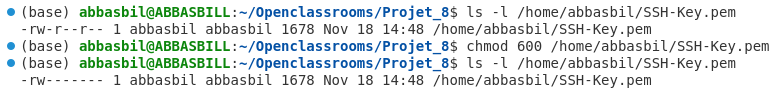


### Étape 10 : Autoriser le tunnel SSH dans AWS

Pour pouvoir accéder à **JupyterHub** et aux **logs Spark** directement depuis votre machine locale, il est nécessaire de configurer un tunnel SSH. Cette étape implique de modifier les règles de sécurité du pare-feu AWS.

#### Contexte :
- Les services comme **JupyterHub** ou les **logs Spark** sont accessibles uniquement sur le réseau local du driver EMR.
- Le port **22** (utilisé pour SSH) est bloqué par défaut par le pare-feu d'AWS.
- Nous devons explicitement autoriser ce port pour établir une connexion SSH.
- **Remarque importante :** AWS ne donne pas toujours un nom explicite comme `ElasticMapReduce-master` au groupe de sécurité associé à votre cluster EMR.

#### Étapes à suivre :

1. **Accéder à la configuration des groupes de sécurité :**
   - Se rendre dans la console AWS.
   - Naviguer vers **EC2** -> **Groupes de sécurité**.
   - Rechercher et sélectionner le groupe de sécurité associé à votre cluster EMR.  
     

2. **Modifier les règles entrantes :**
   - Cliquer sur **Actions** -> **Modifier les règles entrantes**.
   - Cliquer sur **Ajouter une règle** deux fois.

3. **Configurer les nouvelles règles :**
   - Ajouter une règle pour autoriser SSH (port **22**) :
     - **Type** : SSH.
     - **Protocole** : TCP.
     - **Plage de ports** : 22.
     - **Source** : "Mon IP" (ou "N'importe où" pour tester rapidement, mais attention à la sécurité).

#### Résultat :
Une fois ces étapes complétées, le port **22** sera ouvert pour le driver EMR, ce qui permettra d'établir un tunnel SSH depuis votre machine locale.


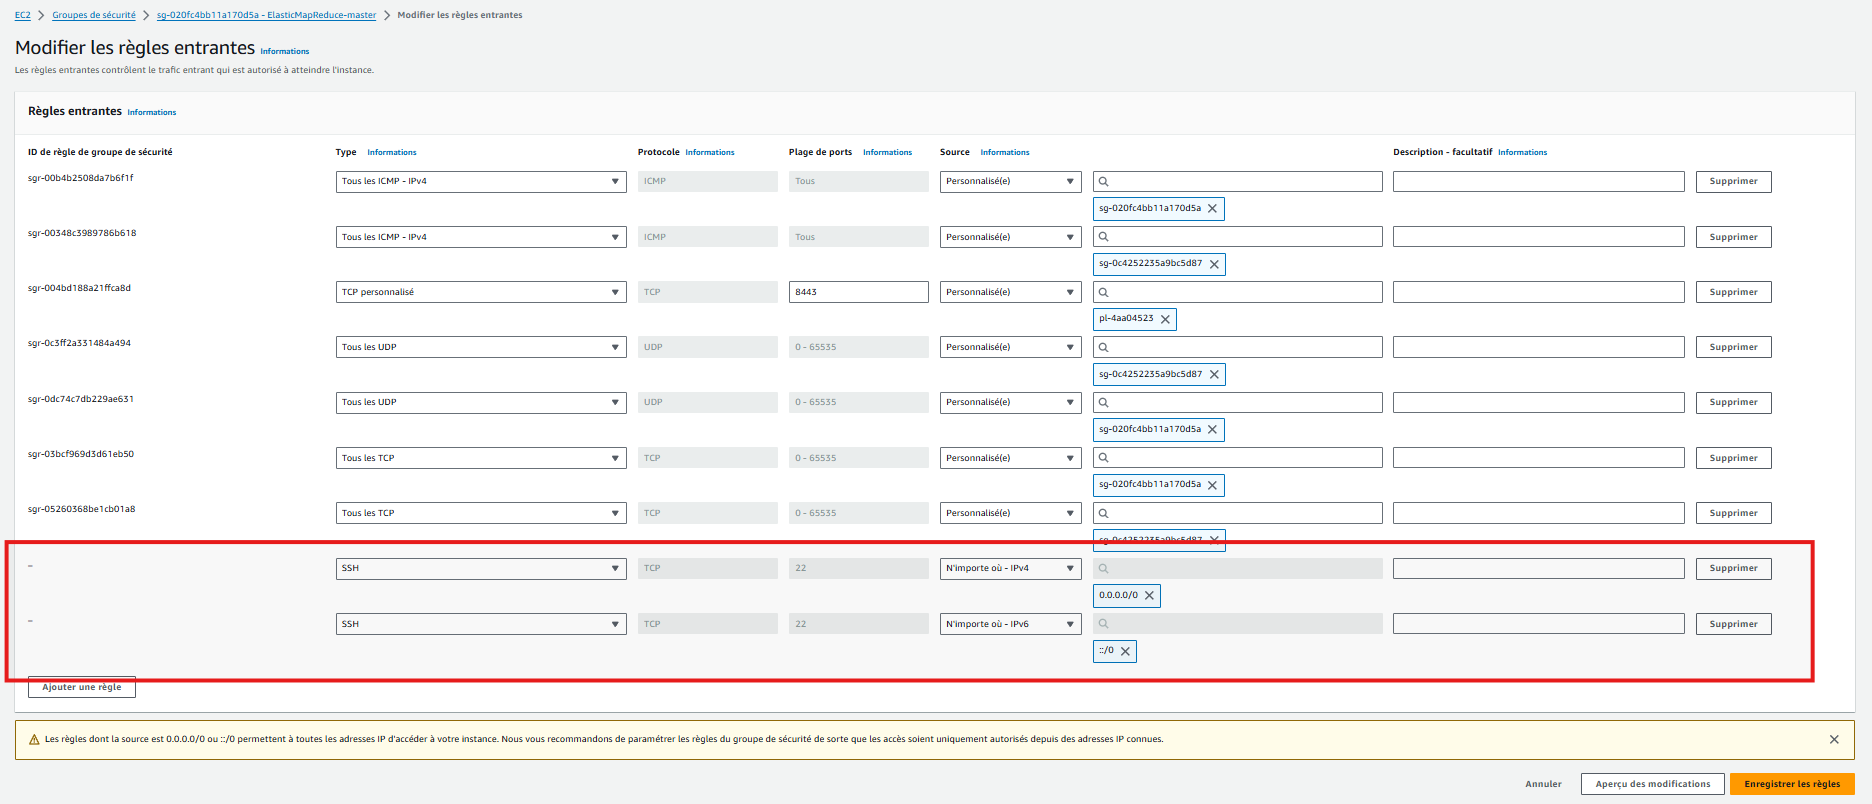






### Étape 11 : Configuration du serveur EMR mise à jour avec la configuration avancée


##### **Étape 1 : Créer un cluster**
1. **Accéder à EMR** :
   - Ouvrir la console AWS.
   - Aller dans **Services** → **EMR** → **Créer un cluster**.

2. **Applications principales** :
   - Sélectionner les applications nécessaires au projet :
     - **Spark** : Exécution des traitements distribués.
     - **JupyterHub** : Interaction avec les notebooks.
     - **TensorFlow** : Pour l’apprentissage automatique.
   - **Version EMR recommandée** :
     - Choisir **EMR version 6.12.0**, offrant compatibilité et stabilité avec Spark 3.4 et TensorFlow 2.11.

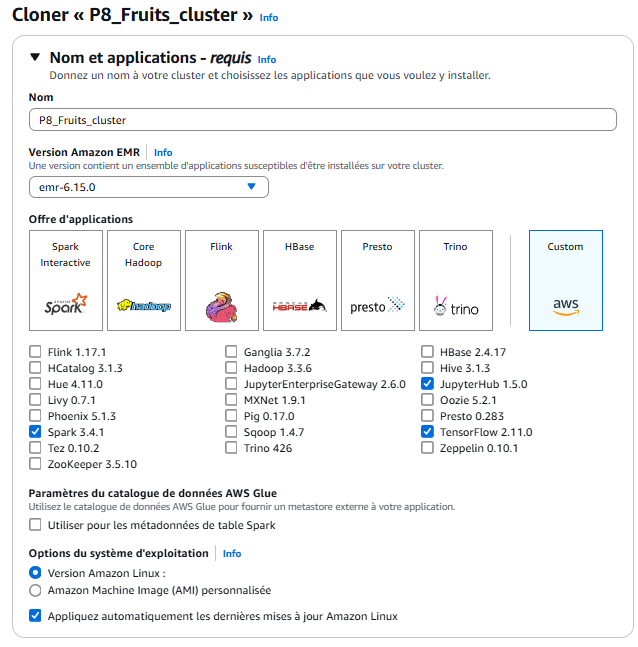

##### **Étape 2 : Configuration avancée**
1. **Objectif** :
   - Configurer **JupyterHub** pour stocker et lire les notebooks sur S3 uniquement.
2. **Action** :
   - Dans la section **Paramètres du logiciel** (configuration avancée du cluster), ajouter le JSON suivant :
     ```json
     [
       {
         "classification": "jupyter-s3-conf",
         "properties": {
           "s3.persistence.bucket": "p8-data-billel",
           "s3.persistence.enabled": "true"
         }
       }
     ]
     ```
   - Ce paramètre garantit que tous les notebooks sont directement enregistrés et lus depuis votre bucket S3 : `p8-data-billel`.


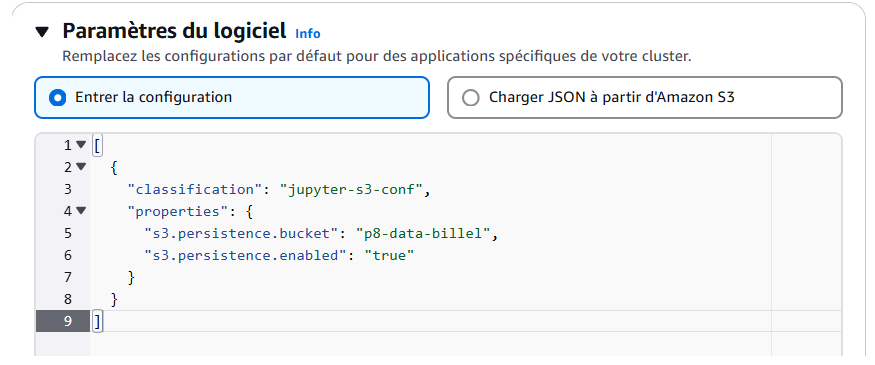


##### **Étape 3 : Configuration des machines du cluster**
1. **Configuration recommandée** :
   - **Machine principale (Master)** : 
     - 1 instance **m5.xlarge**.
    
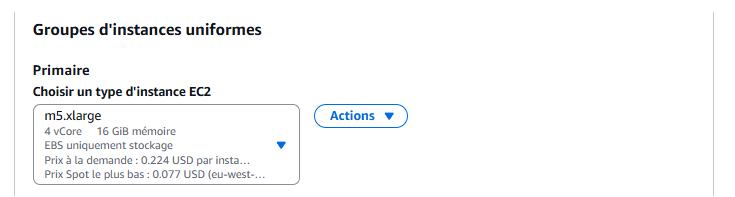

   - **Unité principale (Core)** : 
     - 1 instance **m5.xlarge**.

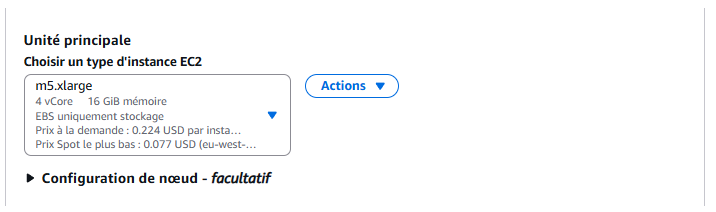

   - **Unité de tâche (Task)** : 
     - 6 instances **m5.xlarge**.

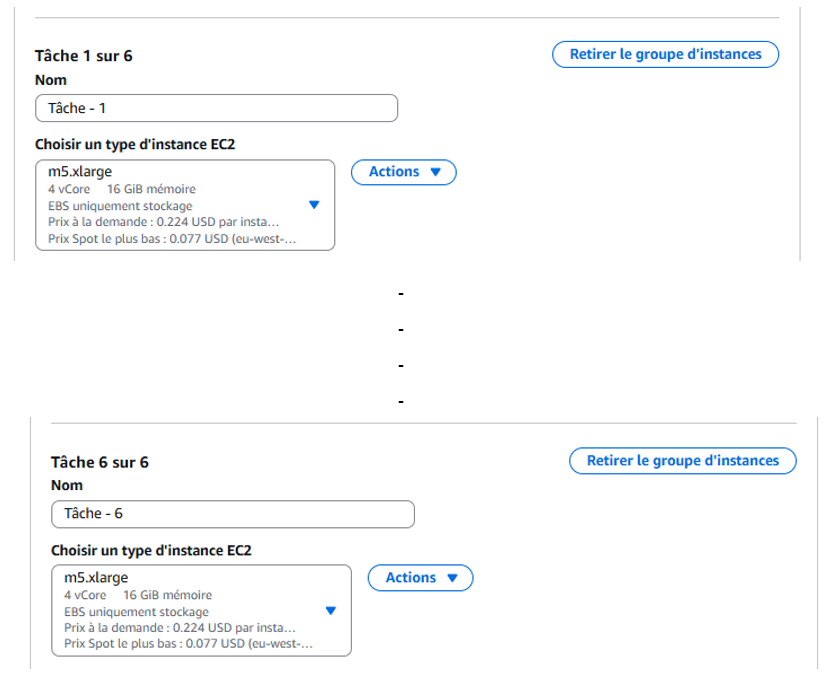

2. **Rôles des nœuds** :
   - **Primaire (Master)** : Gère les ressources et exécute les composants principaux.
   - **Unité principale (Core)** : Coordonne le stockage HDFS et les tâches parallèles.
   - **Unité de tâche (Task)** : Exécute uniquement les calculs, sans stockage HDFS.

   > En savoir plus : [Master, Core, et Task sur AWS](https://docs.aws.amazon.com/emr/latest/ManagementGuide/emr-master-core-task-nodes.html).



##### **Étape 4 : Désactiver la protection contre la résiliation**
1. **Objectif** :
   - Autoriser la suppression du cluster après utilisation.
2. **Action** :
   - Décochez l’option **"Utiliser la protection contre la résiliation"**.

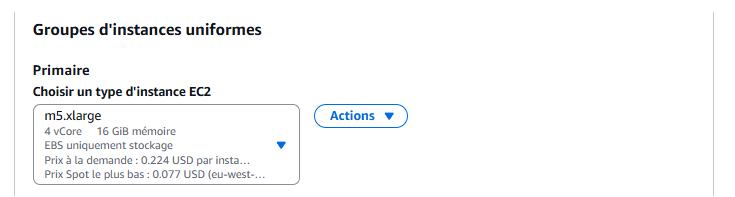

##### **Étape 5 : Actions d’amorçage (Bootstrap)**

1. **Objectif** :  
   - Installer des dépendances supplémentaires nécessaires sur toutes les instances, en s'assurant de la compatibilité avec Amazon EMR.

2. **Créer un script bootstrap** :  
   - Contenu du fichier `bootstrap.sh` :  
     ```bash
     #!/bin/bash
     sudo python3 -m pip install --upgrade setuptools pip
     sudo python3 -m pip install wheel
     sudo python3 -m pip install pillow
     sudo python3 -m pip install pandas==1.3.5
     sudo python3 -m pip install pyarrow==7.0.0
     sudo python3 -m pip install boto3
     sudo python3 -m pip install s3fs
     sudo python3 -m pip install fsspec
     ```  

   - **Mise à jour de setuptools et pip** : Garantit un environnement à jour et minimise les conflits de dépendances.  
   - **pandas 1.3.5** : Version compatible avec Spark 3.3 et PyArrow.  
   - **pyarrow 7.0.0** : Aligné sur la compatibilité avec EMR et Pandas.  
   - **boto3, s3fs, fsspec** : Fournit des outils pour interagir avec AWS et les systèmes de fichiers distribués.  
   - **wheel et pillow** : Requis pour certaines dépendances supplémentaires ou applications basées sur Python.


3. **Charger le script bootstrap sur S3** :
   - Exécuter :
     ```bash
     aws s3 cp bootstrap.sh s3://p8-data-billel
     ```
   - Vérifier que le fichier est dans le bucket :
     ```bash
     aws s3 ls s3://p8-data-billel
     ```

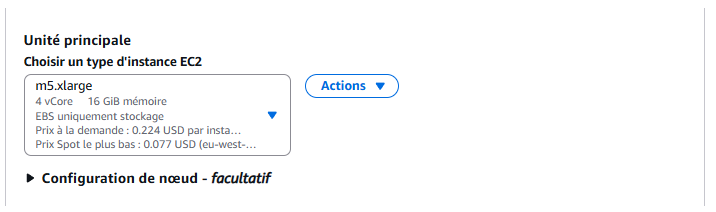


4. **Ajouter le script dans les actions d’amorçage du cluster** :
   - Pendant la configuration du cluster, aller dans **Actions d’amorçage** → **Ajouter** et fournir le chemin S3 du fichier.

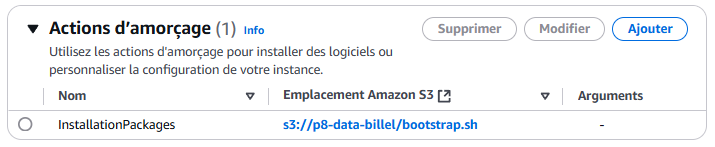


##### **Étape 6 : Ajouter la paire de clés SSH**
1. **Objectif** :
   - Ajouter la paire de clés SSH pour permettre une connexion sécurisée au cluster.
2. **Action** :
   - Sélectionner la clé **SSH-Key.pem** créée précédemment dans la configuration de sécurité.

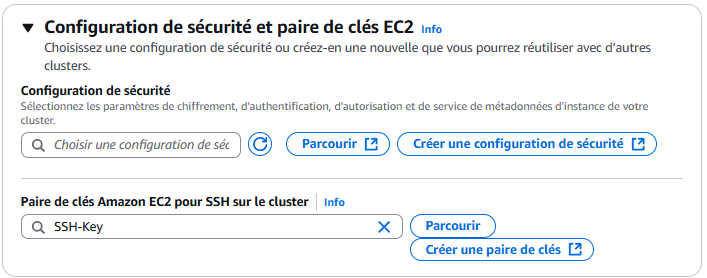


##### **Étape 7 : Autoriser l’accès aux buckets S3**
1. **Objectif** :
   - Permettre au cluster d’accéder à toutes les données stockées sur vos buckets S3.
2. **Action** :

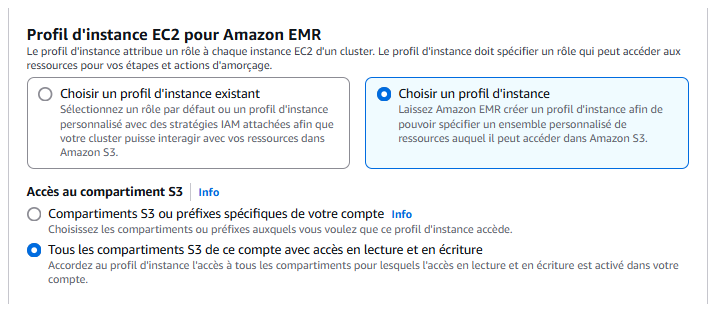

##### **Étape 8 : Lancer le cluster**
1. **Action** :
   - Une fois toutes les configurations terminées, cliquer sur **Lancer le cluster**.
2. **Vérification** :
   - Attendre que le cluster atteigne le statut **En attente**, indiquant qu’il est prêt à être utilisé.

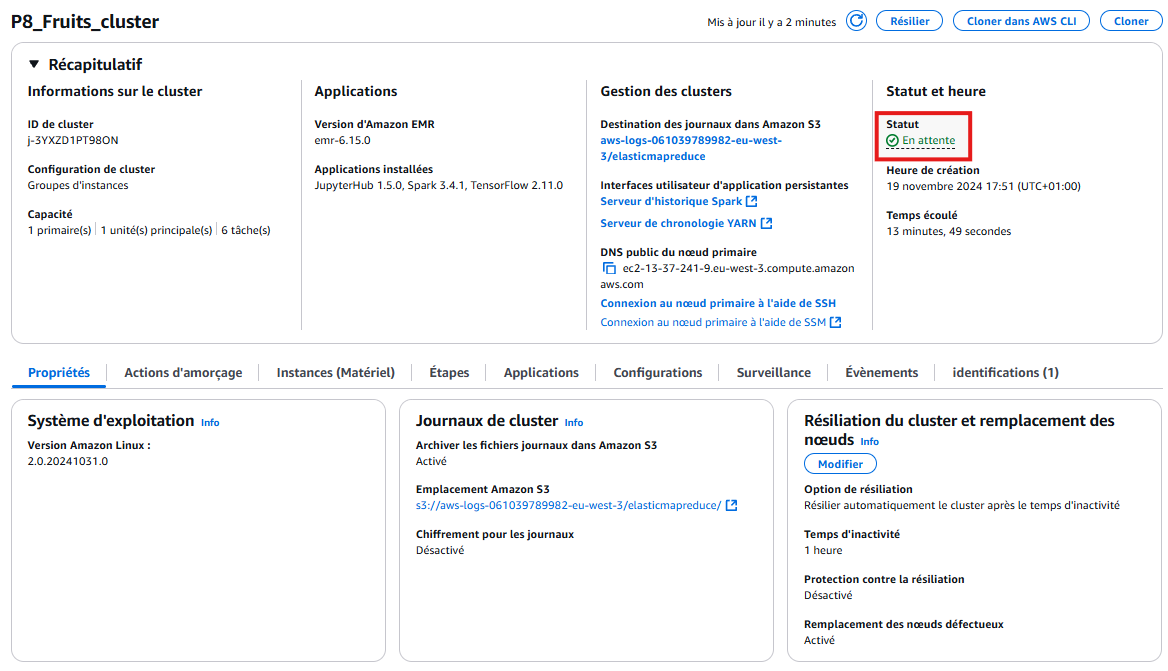


### Étape 12 : Établir un tunnel SSH avec le cluster  
1. Assurez-vous que le serveur est actif.  
2. Cliquez sur **"Connexion au nœud primaire à l'aide de SSH"** dans la console AWS.  
3. Copiez le lien proposé pour l'utiliser dans un terminal Bash.  
4. Si vous souhaitez utiliser un autre port que le 22, ajoutez une option comme `-D 8157` au lien pour rediriger le trafic.

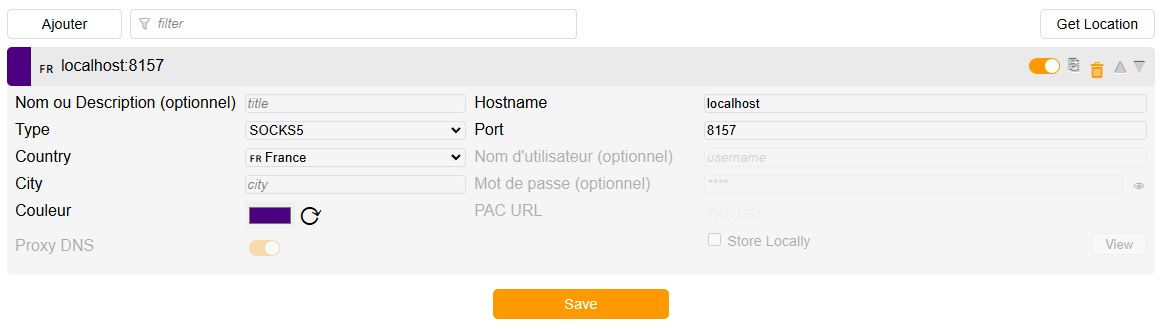


### Étape 13 : Configurer le navigateur pour utiliser le tunnel SSH  
1. Si vous utilisez Google Chrome, installez et configurez l'extension **FoxyProxy**.  
2. Configurez l'extension pour rediriger le trafic via le tunnel SSH précédemment établi.  

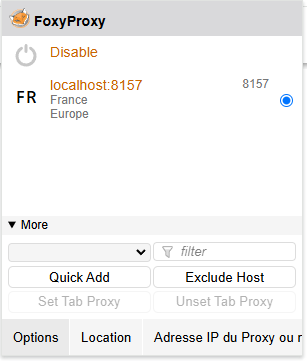


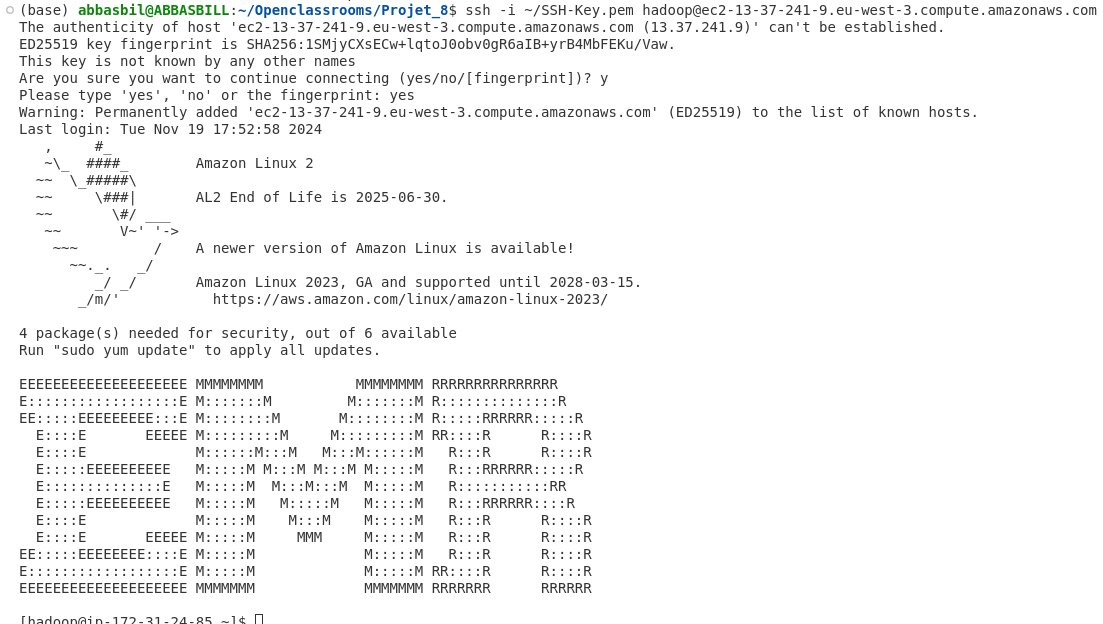


### Étape 14 : Accéder au Notebook JupyterHub

1. **Accéder aux applications disponibles :**
   - Rendez-vous dans l'onglet **"Applications"** de votre cluster Amazon EMR.
   - Vous y trouverez la liste des applications déployées, dont **JupyterHub**.

2. **Ouvrir JupyterHub :**
   - Cliquez sur le lien de **JupyterHub** pour l’ouvrir dans votre navigateur.
   - Assurez-vous que le **tunnel SSH** est actif pour accéder à cette interface depuis votre machine locale.

3. **Identifiants pour se connecter :**
   - Utilisez les identifiants suivants pour vous connecter à JupyterHub :
     - **Login** : `jovyan`
     - **Mot de passe** : `jupyter`

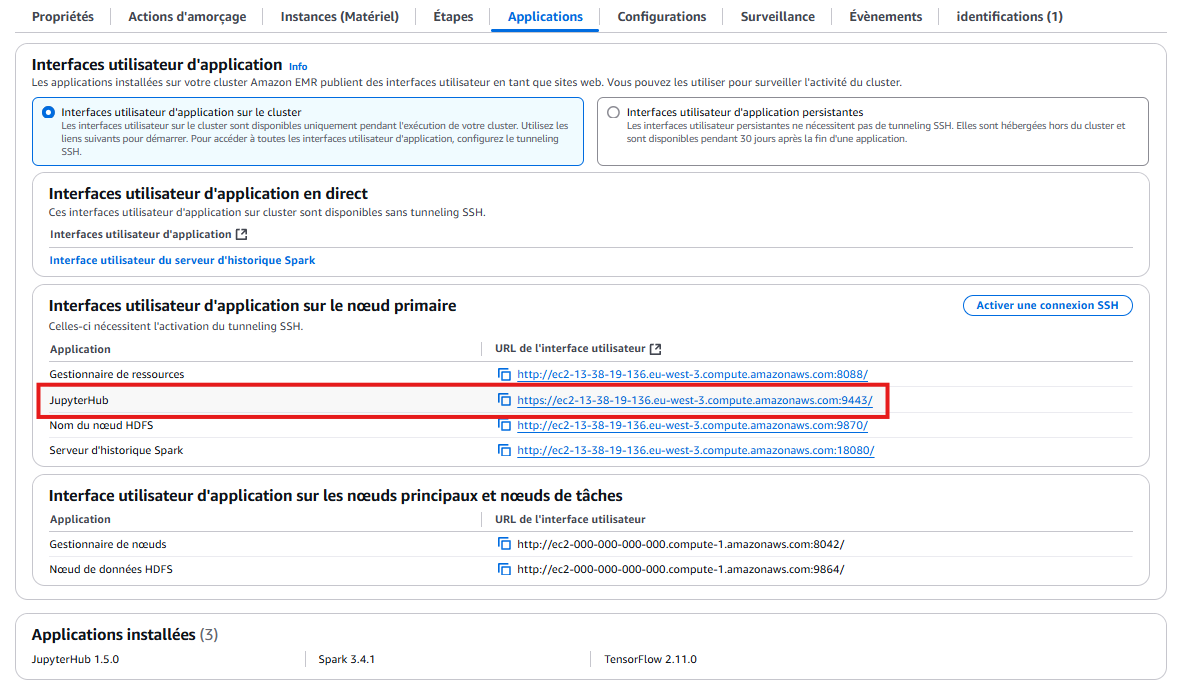

## Script PySpark (cloud)

## Configurations PySpark

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
%%info

### Stage 0 -> 2 : Conversion des images en format binaire

In [3]:
PATH = 's3://p8-data-billel'
PATH_Data = PATH+'/Test'
PATH_Result = PATH+'/Results'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Result: '+PATH_Result)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

PATH:        s3://p8-data-billel
PATH_Data:   s3://p8-data-billel/Test
PATH_Result: s3://p8-data-billel/Results

In [4]:
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(PATH_Data)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

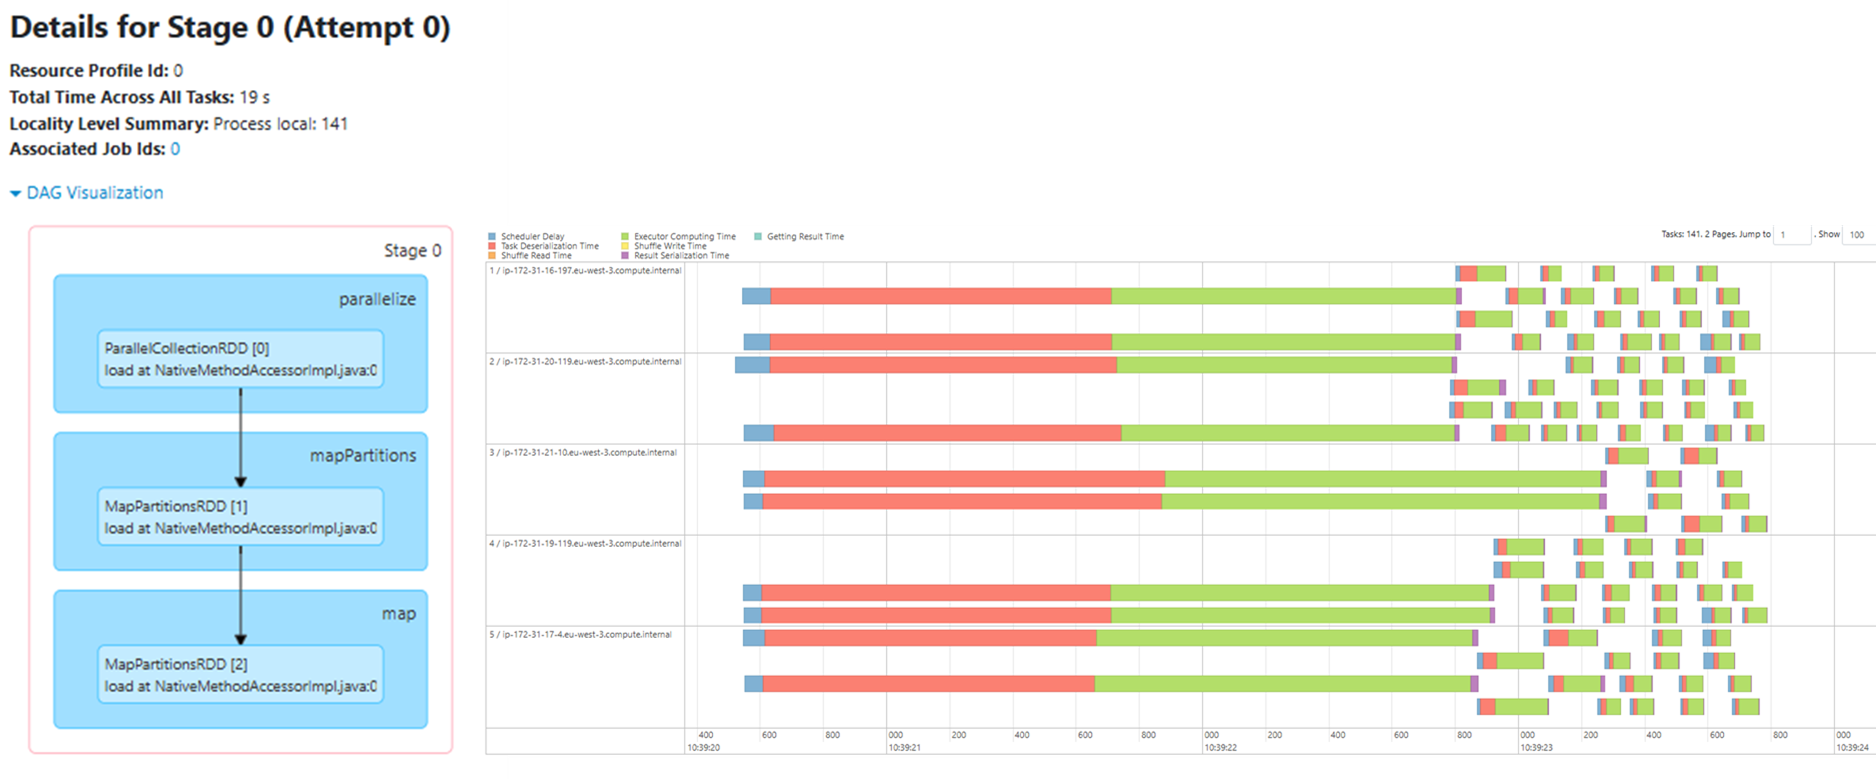

In [5]:
images.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|s3://p8-data-bill...|2024-11-18 13:30:15|  7353|[FF D8 FF E0 00 1...|
|s3://p8-data-bill...|2024-11-18 13:30:15|  7350|[FF D8 FF E0 00 1...|
|s3://p8-data-bill...|2024-11-18 13:30:15|  7349|[FF D8 FF E0 00 1...|
|s3://p8-data-bill...|2024-11-18 13:30:16|  7348|[FF D8 FF E0 00 1...|
|s3://p8-data-bill...|2024-11-18 13:30:16|  7328|[FF D8 FF E0 00 1...|
+--------------------+-------------------+------+--------------------+
only showing top 5 rows

In [6]:
images = images.withColumn('label', element_at(split(images['path'], '/'),-2))
print(images.printSchema())
print(images.select('path','label').show(5,False))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: string (nullable = true)

None
+---------------------------------------------------+------------+
|path                                               |label       |
+---------------------------------------------------+------------+
|s3://p8-data-billel/Test/Watermelon 1/r_106_100.jpg|Watermelon 1|
|s3://p8-data-billel/Test/Watermelon 1/r_109_100.jpg|Watermelon 1|
|s3://p8-data-billel/Test/Watermelon 1/r_108_100.jpg|Watermelon 1|
|s3://p8-data-billel/Test/Watermelon 1/r_107_100.jpg|Watermelon 1|
|s3://p8-data-billel/Test/Watermelon 1/r_95_100.jpg |Watermelon 1|
+---------------------------------------------------+------------+
only showing top 5 rows

None

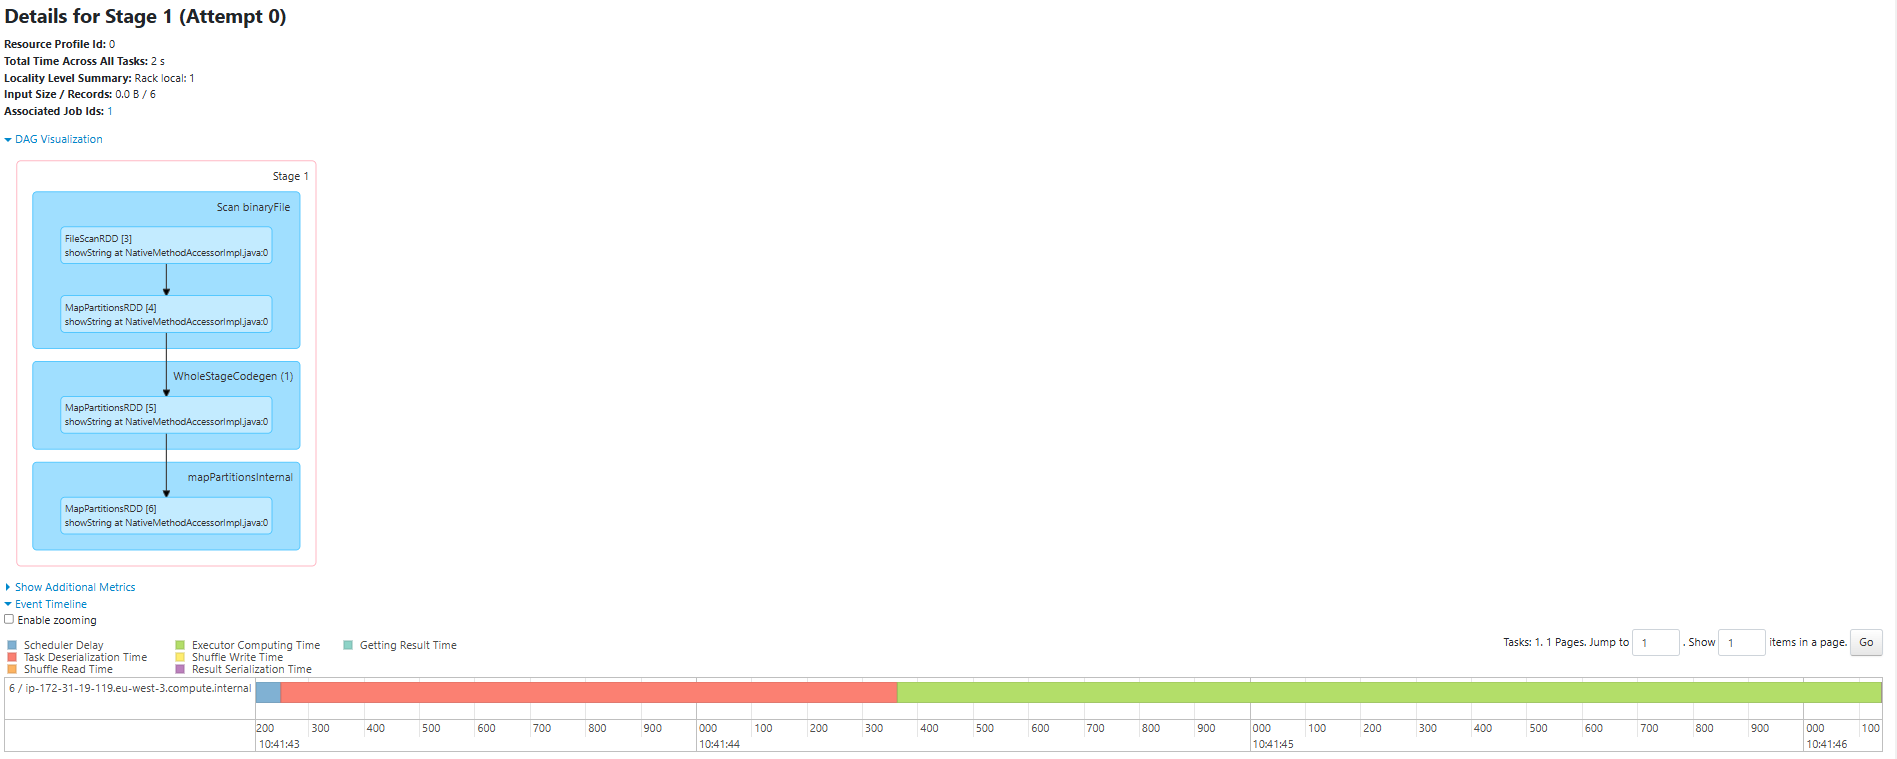

### Stage 3 : Extraction des features avec le modèle MobileNetV2

In [7]:
model = MobileNetV2(weights='imagenet',
                    include_top=True,
                    input_shape=(224, 224, 3))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

14536120/14536120 [==============================] - 1s 0us/step

In [8]:
new_model = Model(inputs=model.input,
                  outputs=model.layers[-2].output)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
new_model.summary()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [10]:
brodcast_weights = sc.broadcast(new_model.get_weights())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
def model_fn():
    """
    Returns a MobileNetV2 model with top layer removed 
    and broadcasted pretrained weights.
    """
    
    # Chargement du modèle préentraîné MobileNetV2
    model = MobileNetV2(weights='imagenet',
                        include_top=True,
                        input_shape=(224, 224, 3))
    
    # Fixer les poids comme non entraînables
    for layer in model.layers:
        layer.trainable = False
    
    # Suppression de la dernière couche et définition de la sortie
    new_model = Model(inputs=model.input,
                      outputs=model.layers[-2].output)
    
    # Initialisation des poids avec les poids diffusés
    new_model.set_weights(brodcast_weights.value)
    
    return new_model

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
def preprocess(content):
    """
    Preprocesses raw image bytes for prediction.
    """
    # Chargement et redimensionnement de l'image
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    
    # Conversion de l'image en tableau NumPy
    arr = img_to_array(img)
    
    # Prétraitement des données pour correspondre au modèle MobileNetV2
    return preprocess_input(arr)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
def featurize_series(model, content_series):
    """
    Featurize a pd.Series of raw images using the input model.
    :return: a pd.Series of image features
    """
    # Prétraitement des images et empilement dans un tableau NumPy
    input = np.stack(content_series.map(preprocess))
    
    # Extraction des features en utilisant le modèle
    preds = model.predict(input)
    
    # Aplatissement des features multidimensionnelles pour un stockage plus simple
    output = [p.flatten() for p in preds]
    
    return pd.Series(output)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
from pyspark.sql.functions import pandas_udf
from typing import Iterator
import pandas as pd

@pandas_udf("array<float>")  # Spécifie le type de sortie comme un tableau de floats
def featurize_udf(content_series_iter: Iterator[pd.Series]) -> Iterator[pd.Series]:
    """
    This method is a Scalar Iterator pandas UDF wrapping our featurization function.
    The decorator specifies that this returns a Spark DataFrame column of type ArrayType(FloatType).

    :param content_series_iter: This argument is an iterator over batches of data, where each batch
                              is a pandas Series of image data.
    """
    # Charger le modèle une seule fois
    model = model_fn()
    
    # Boucle sur les lots de données et application de la featurisation
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
features_df = images.sample(False, 1.0).repartition(20).select(col("path"),
                                            col("label"),
                                            featurize_udf("content").alias("features")
                                           )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
print(PATH_Result)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

s3://p8-data-billel/Results

### Stage 5 : **Chargement des données enregistrées et validation des résultats :**

In [17]:
features_df.write.mode("overwrite").parquet(PATH_Result)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

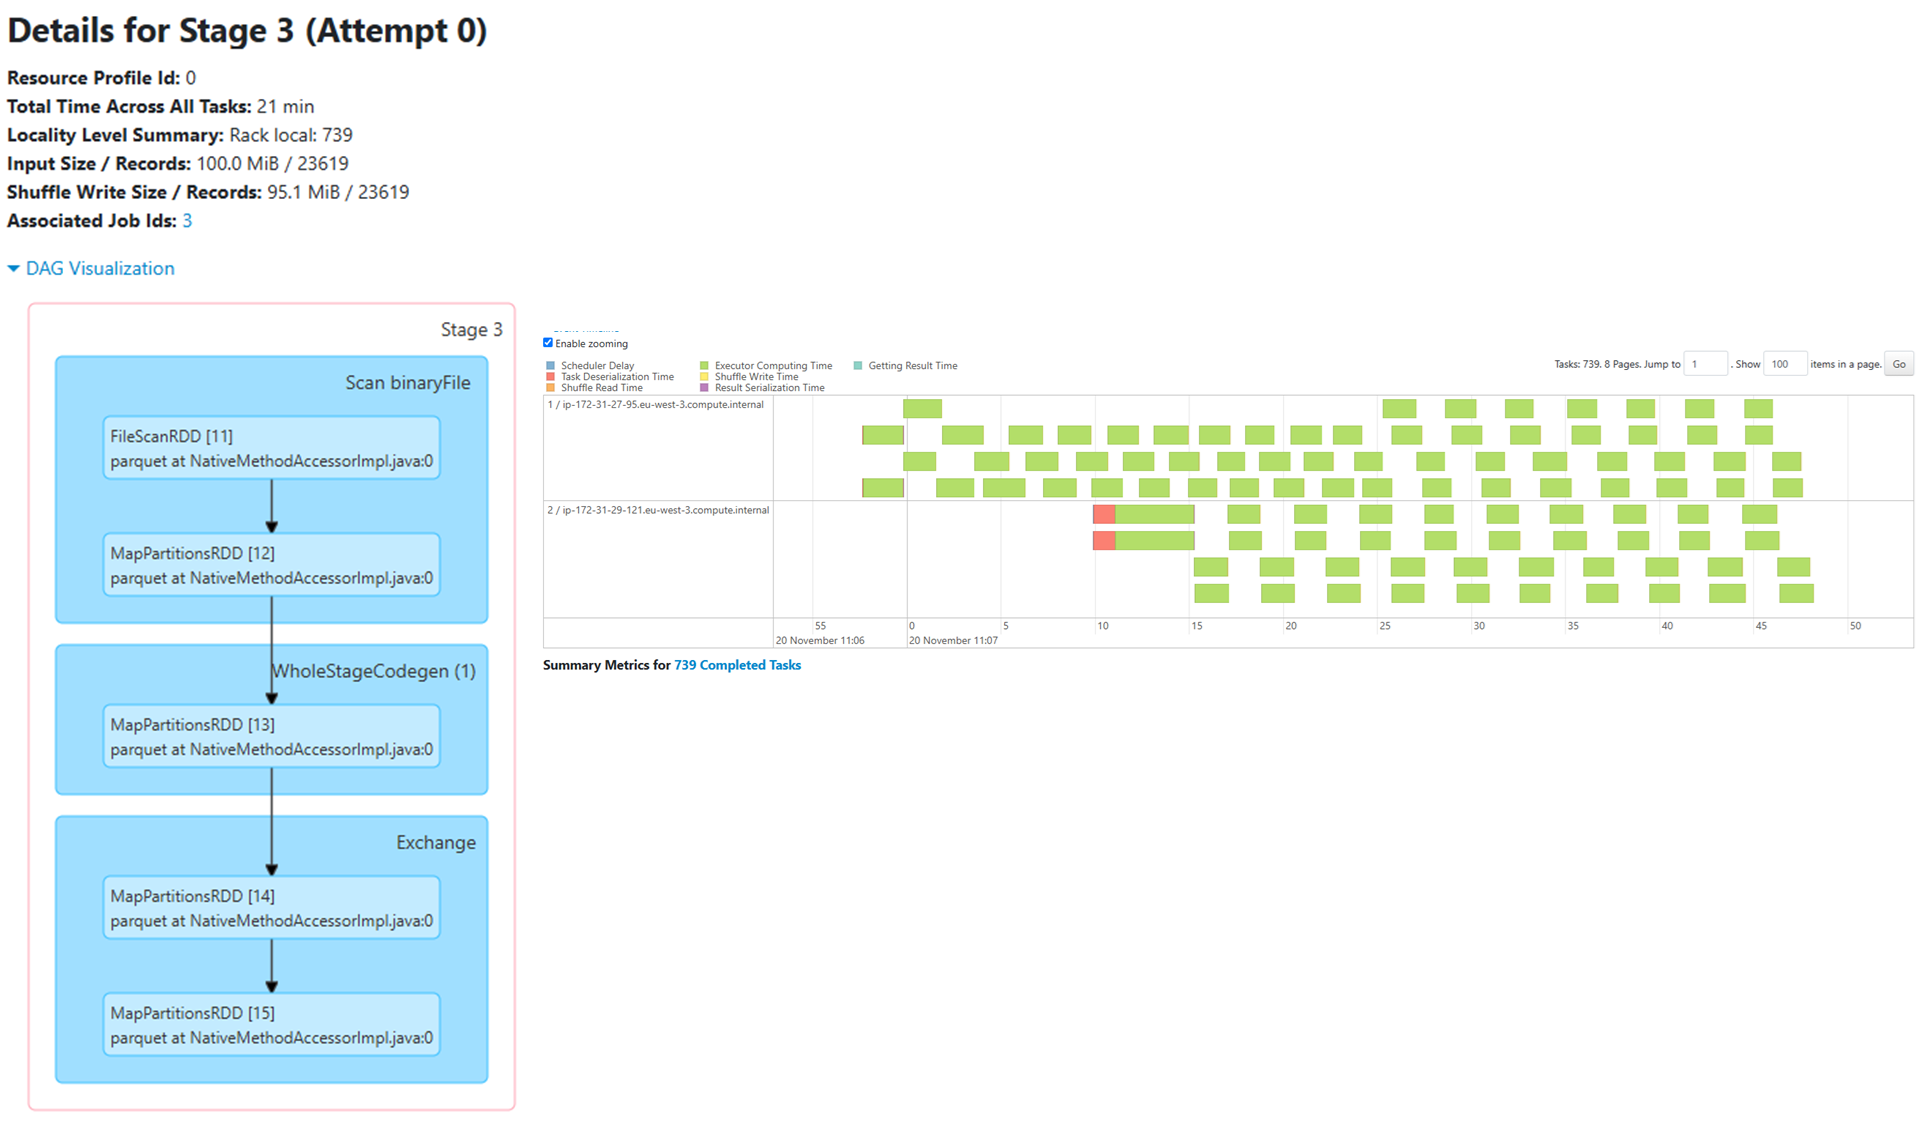


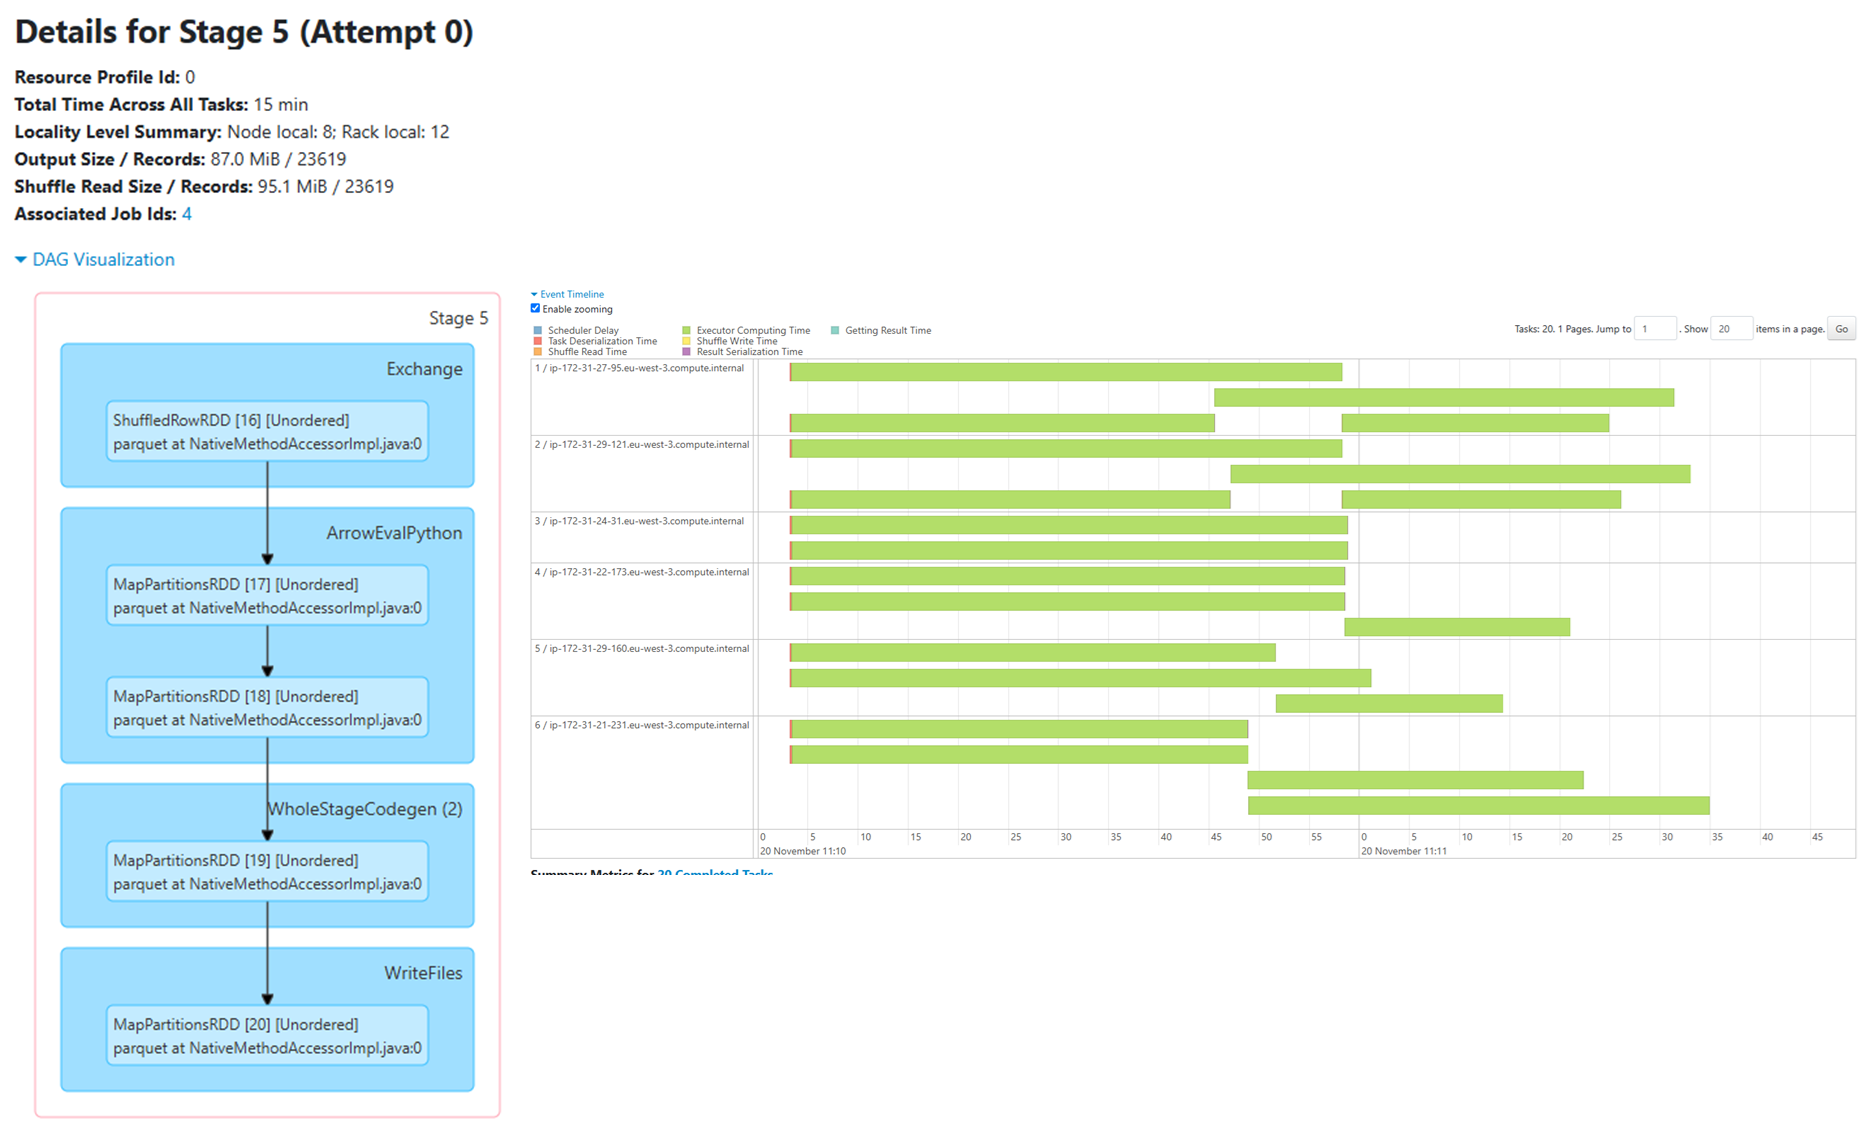

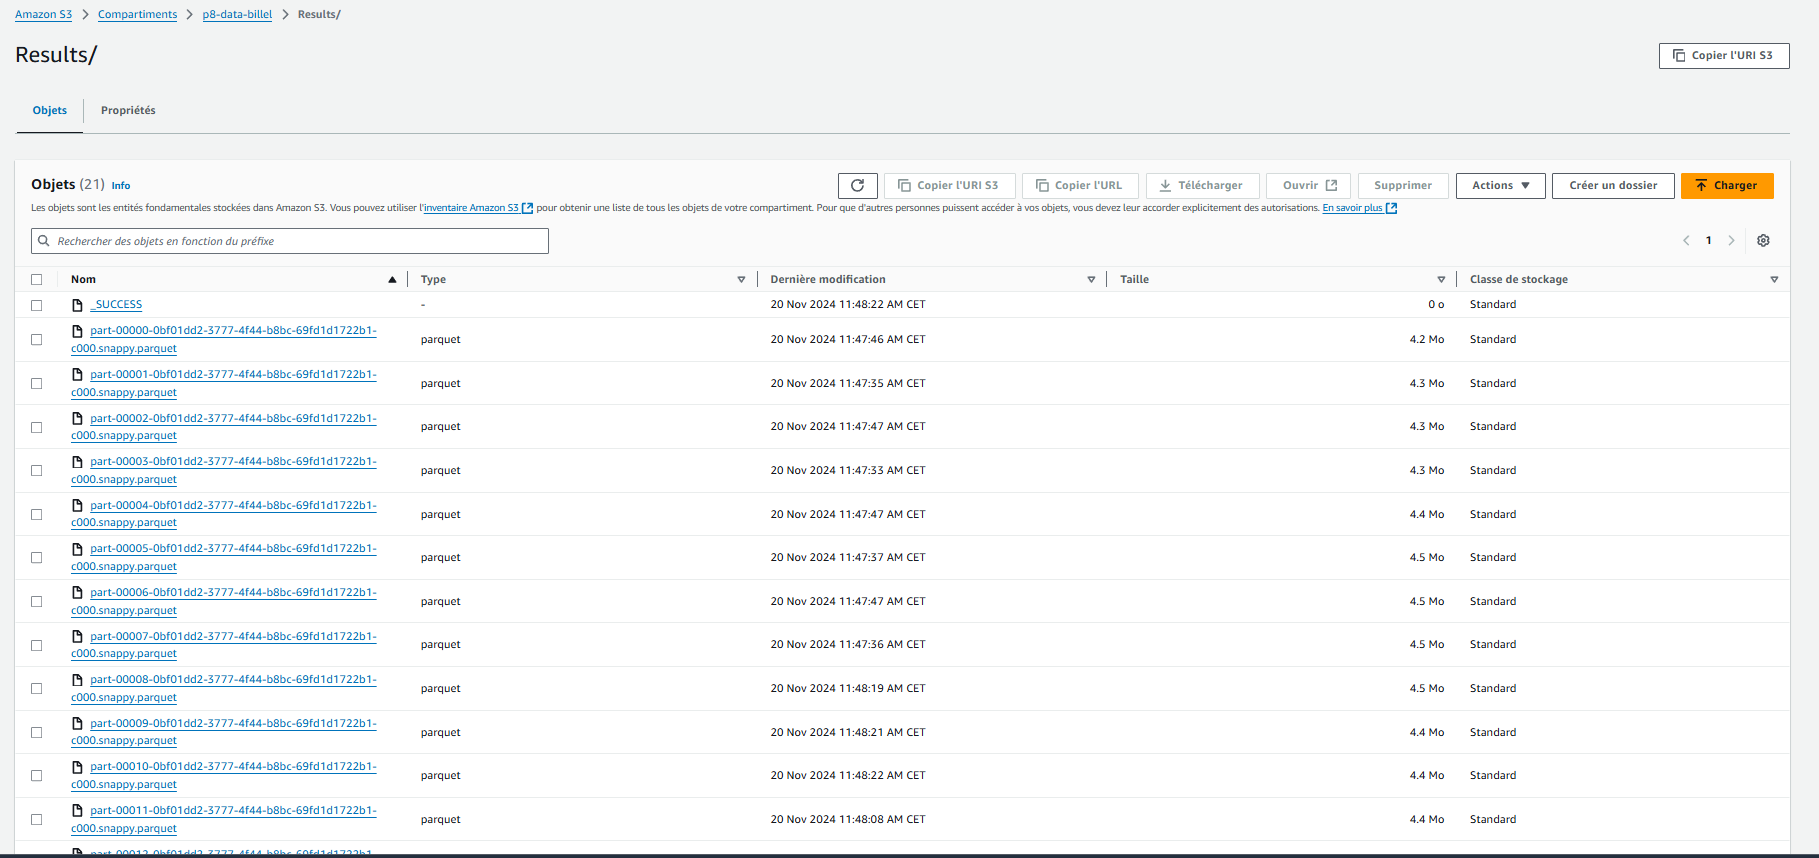

On affiche le DataFrame:

In [18]:
df = pd.read_parquet(PATH_Result, engine='pyarrow')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                    path  ...                                           features
0      s3://p8-data-billel/Test/Watermelon 1/r_79_100...  ...  [0.41546595, 0.12894784, 0.0, 0.027542796, 0.1...
1      s3://p8-data-billel/Test/Watermelon 1/r_67_100...  ...  [1.0782965, 0.5631671, 0.0, 0.103598304, 0.699...
2      s3://p8-data-billel/Test/Watermelon 1/r_101_10...  ...  [0.0016325737, 0.45901388, 0.0, 0.0, 0.6156974...
3      s3://p8-data-billel/Test/Pineapple Mini 1/79_1...  ...  [0.0, 4.2574773, 0.0, 0.0, 0.0, 0.0, 0.1368019...
4      s3://p8-data-billel/Test/Pineapple Mini 1/21_1...  ...  [0.0, 4.5370426, 0.0, 0.0, 0.0, 0.0, 0.0337962...
...                                                  ...  ...                                                ...
23614  s3://p8-data-billel/Test/Apple hit 1/r0_311_10...  ...  [0.1760214, 0.020486034, 0.0, 0.0, 0.0, 0.2799...
23615  s3://p8-data-billel/Test/Apple hit 1/r0_295_10...  ...  [0.011726379, 0.08102585, 0.0, 0.

On vérifie les dimensions des **features** :

In [20]:
df.loc[0, 'features'].shape

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(1280,)

In [21]:

df = df.sample(frac=0.5, random_state=42)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Stage 6 -> 63 : **Execution de la PCA:**

In [22]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
import pandas as pd

# Initialisation de la session Spark (dans EMR, SparkSession est déjà configurée)
spark = SparkSession.builder.appName("PCA_EMR").getOrCreate()

# Réduction des logs pour ne garder que les erreurs
spark.sparkContext.setLogLevel("ERROR")


# Étape 1 : Conversion du DataFrame Pandas en DataFrame Spark
# Transformation de la colonne 'features' en vecteurs denses compatibles avec PySpark
df['features'] = df['features'].apply(Vectors.dense)
df_spark = spark.createDataFrame(df)

# Étape 2 : Création et application d'un VectorAssembler pour préparer les données
vecAssembler = VectorAssembler(inputCols=["features"], outputCol="features_vec")
df_spark = vecAssembler.transform(df_spark)

# Étape 3 : Initialisation des paramètres pour la PCA
variances = []  # Stockage des variances expliquées pour chaque k
resultats = []  # Résultats finaux (k, variance expliquée)
total_features = len(df_spark.select(col("features")).first()[0])  # Nombre total de features
step_size = max(1, int(total_features * 0.01))  # 1 % des features minimum (au moins 1)

# Étape 4 : Boucle pour calculer les variances expliquées pour différentes valeurs de k
for k in range(1, total_features + 1, step_size):
    # Initialisation du modèle PCA
    pca = PCA(k=k, inputCol="features_vec", outputCol="pcaFeatures")
    
    # Entraînement du modèle
    model = pca.fit(df_spark)
    
    # Calcul de la variance expliquée cumulée
    explained_variance = float(sum(model.explainedVariance))
    variances.append(explained_variance)
    
    # Ajout des résultats pour suivi
    resultats.append((k, explained_variance))
    
    # Arrêt anticipé si la variance expliquée dépasse 80 %
    if explained_variance >= 0.8:
        break

# Ajout final : Toutes les composantes expliquent 100 % de la variance
resultats.append((total_features, 1.0))

# Affichage des résultats
for k, variance in resultats:
    print(f"Nombre de composantes : {k}, Variance expliquée : {variance:.2%}")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Nombre de composantes : 1, Variance expliqu?e : 9.83%
Nombre de composantes : 13, Variance expliqu?e : 49.04%
Nombre de composantes : 25, Variance expliqu?e : 61.25%
Nombre de composantes : 37, Variance expliqu?e : 68.01%
Nombre de composantes : 49, Variance expliqu?e : 72.53%
Nombre de composantes : 61, Variance expliqu?e : 75.91%
Nombre de composantes : 73, Variance expliqu?e : 78.57%
Nombre de composantes : 85, Variance expliqu?e : 80.67%
Nombre de composantes : 1280, Variance expliqu?e : 100.00%

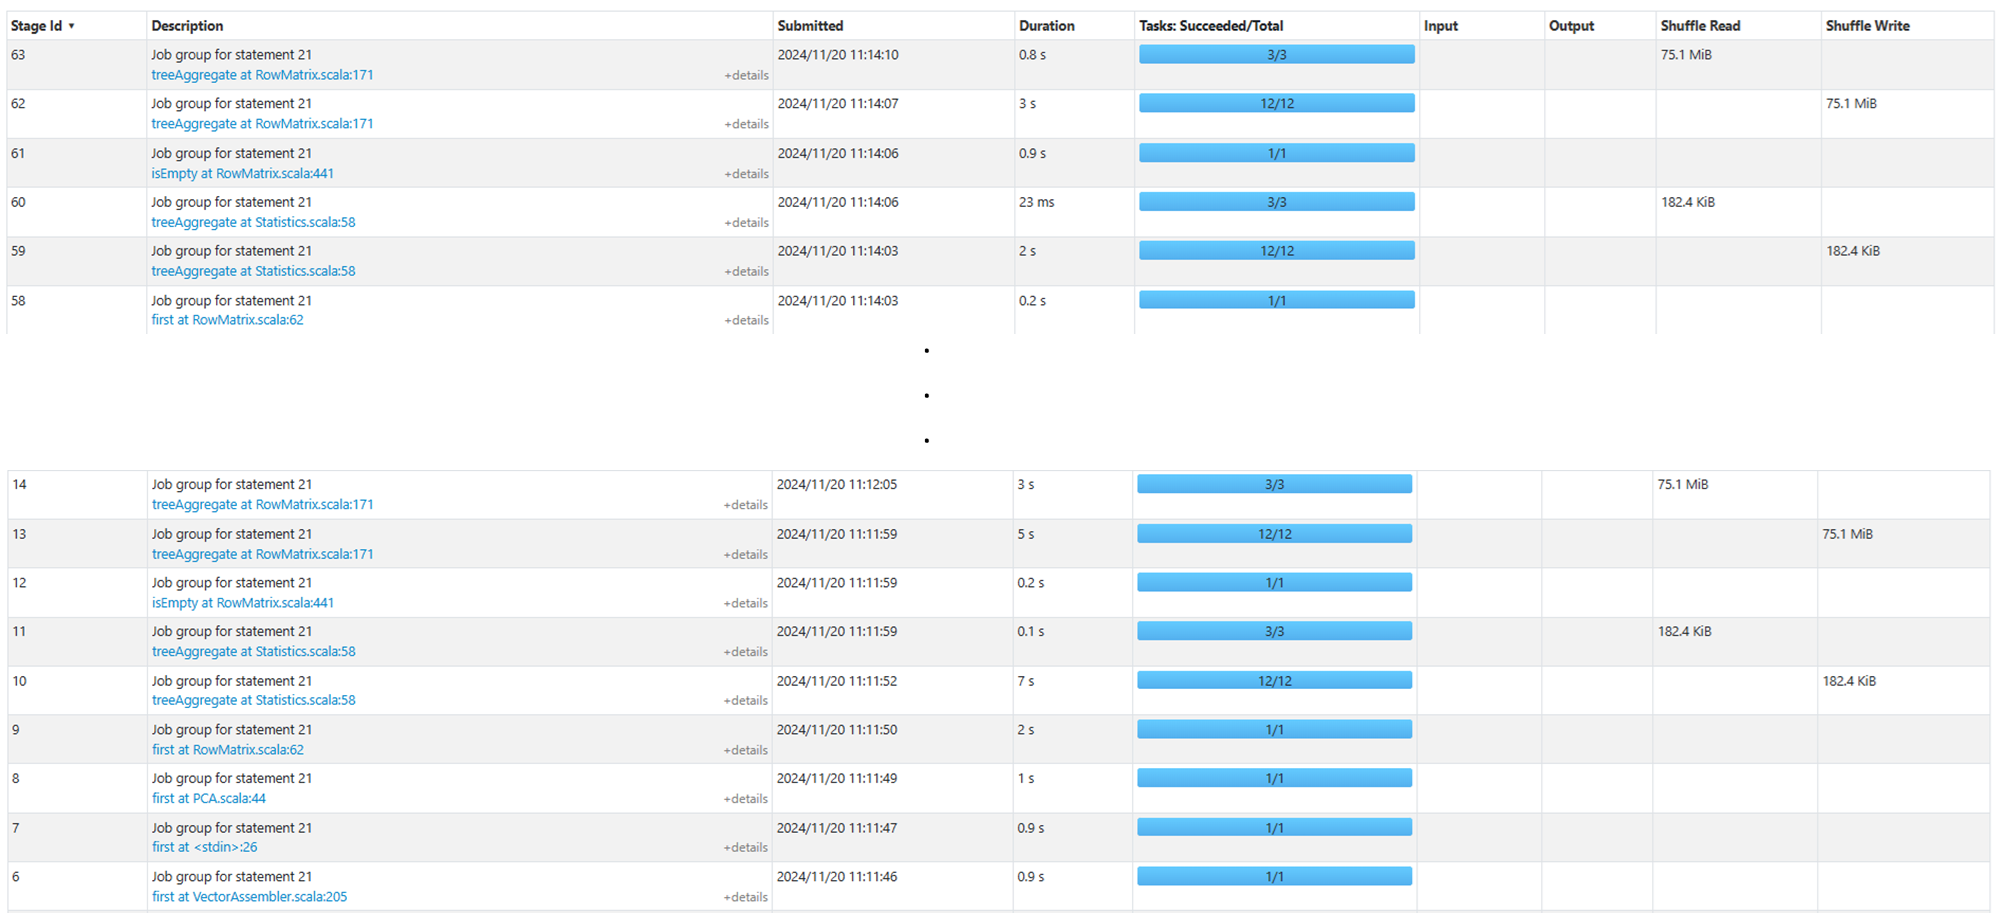

#### **Visualisation de l'explication de la variance en fonction du nombre de composantes principales**

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Étape 1 : Préparer les données pour le graphe
# x_data contient le nombre de composantes principales
# y_data contient la variance expliquée en pourcentage (multipliée par 100 pour passer de fraction à %)
x_data = [i[0] for i in resultats]
y_data = [i[1] * 100 for i in resultats]

# Étape 2 : Créer un graphique
plt.figure(figsize=(10, 6))  # Taille du graphique
plt.plot(x_data, y_data, marker='o', label='Variance expliquée')  # Ligne avec marqueurs pour chaque point

# Étape 3 : Ajouter des titres et des labels
plt.title('Explication de la variance en fonction du Nb de composantes principales')  # Titre du graphique
plt.xlabel('Nombre de composantes principales')  # Label de l'axe x
plt.ylabel('Explication de la variance (%)')  # Label de l'axe y

# Étape 4 : Identifier le point correspondant à 80% de variance expliquée
x_80 = np.interp(80, y_data, np.round(x_data))  # Interpolation pour trouver la valeur de x correspondant à y=80

# Étape 5 : Ajouter une ligne verticale au point x_80
plt.axvline(x=x_80, color='g', label='80% de variance expliquée')  # Ligne verticale verte

# Étape 6 : Ajouter une annotation pour x_80
plt.text(x_80 + 30, 7, f'{math.ceil(x_80)}', color='g', ha='center')  # Texte indiquant la valeur de x

# Étape 7 : Ajouter une légende
plt.legend()  # Affiche la légende du graphique

# Étape 8 : Afficher le graphique
plt.show()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

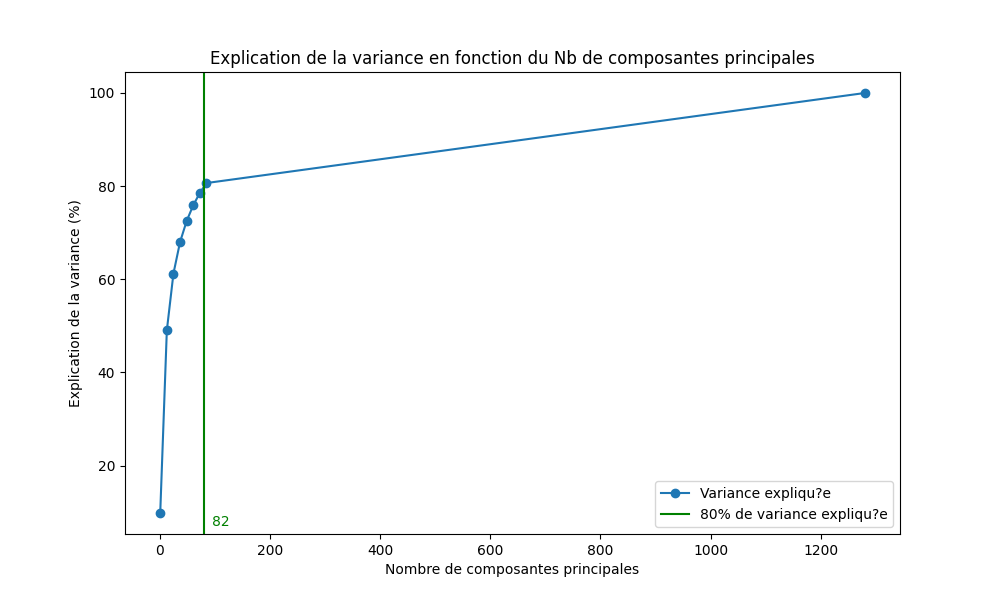

In [32]:
%matplot plt

**Résultat :**

In [26]:
import math

Nb_composants_80 = math.ceil(x_80)
print(f"Le nombre de composantes principales nécessaires pour expliquer 80 % de la variance : {Nb_composants_80}")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Le nombre de composantes principales n?cessaires pour expliquer 80 % de la variance : 82

### **Application de la PCA pour conserver un nombre de composantes expliquant 80 % de la variance:**

In [27]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Réduction des logs à l'essentiel
spark.sparkContext.setLogLevel("ERROR")

# Étape 1 : Conversion du DataFrame Pandas en DataFrame PySpark
# Transformation de la colonne 'features' en vecteurs denses pour compatibilité avec Spark
df['features'] = df['features'].apply(lambda x: Vectors.dense(x))
df_spark = spark.createDataFrame(df)

# Étape 2 : Création et application d'un VectorAssembler
# Combine les colonnes en une seule colonne vectorielle pour le modèle PCA
vecAssembler = VectorAssembler(inputCols=["features"], outputCol="features_vec")
df_spark = vecAssembler.transform(df_spark)

# Étape 3 : Création et entraînement d'un modèle PCA
# Utilisation du nombre de composantes principales correspondant à 80 % de la variance
print(f"Le nombre de composantes principales nécessaires pour expliquer 80 % de la variance : {Nb_composants_80}")
pca = PCA(k=Nb_composants_80, inputCol="features_vec", outputCol="pcaFeatures")
model = pca.fit(df_spark)

# Étape 4 : Transformation des données avec le modèle PCA
result = model.transform(df_spark)

# Étape 5 : Nettoyage des colonnes inutiles
# Suppression de la colonne intermédiaire 'features_vec' pour simplifier le DataFrame
result = result.drop('features_vec')

# Étape 6 : Affichage des résultats
result.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Le nombre de composantes principales n?cessaires pour expliquer 80 % de la variance : 82
+--------------------+------------------+--------------------+--------------------+
|                path|             label|            features|         pcaFeatures|
+--------------------+------------------+--------------------+--------------------+
|s3://p8-data-bill...|           Limes 1|[0.0,0.0958167761...|[-0.2840329102686...|
|s3://p8-data-bill...|           Peach 1|[0.25598284602165...|[1.97351501461889...|
|s3://p8-data-bill...|       Raspberry 1|[0.43698611855506...|[-1.4449731109377...|
|s3://p8-data-bill...|     Grape White 1|[0.07433768361806...|[7.95895653059578...|
|s3://p8-data-bill...|     Pear Kaiser 1|[1.05980801582336...|[0.09708898967627...|
|s3://p8-data-bill...|  Apple Braeburn 1|[0.58667087554931...|[12.3663363028229...|
|s3://p8-data-bill...|           Peach 1|[0.70583045482635...|[8.21125293741886...|
|s3://p8-data-bill...|            Kaki 1|[0.91021776199340...|[13.46842

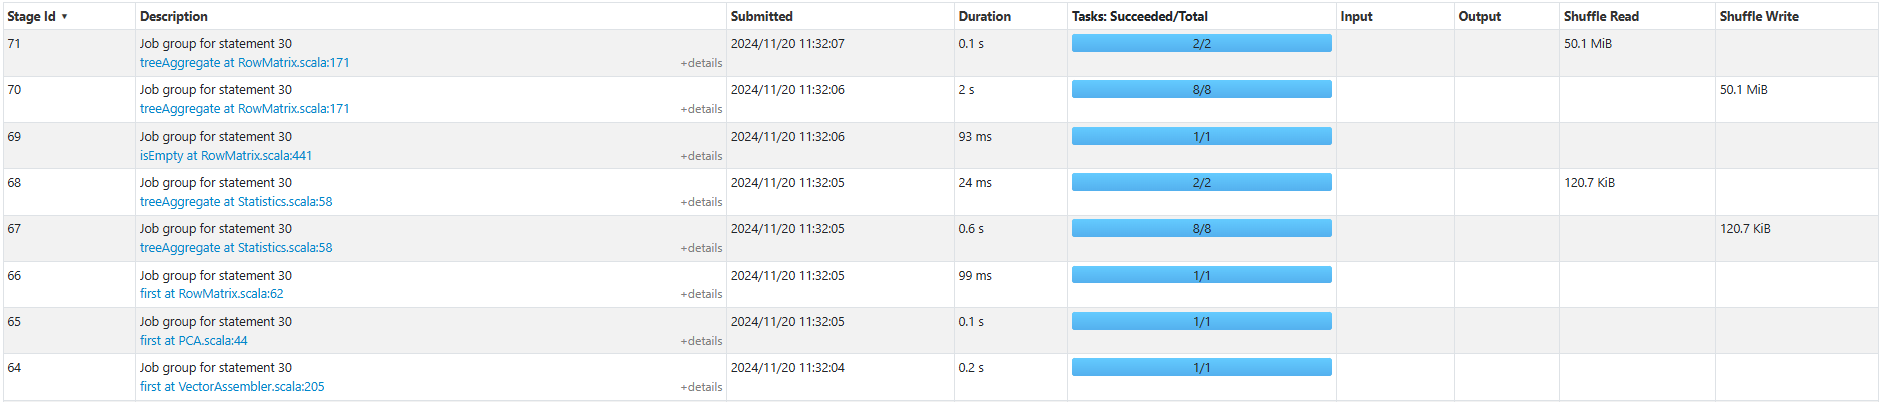

#### **Définition d'un nouveau chemin pour enregistrer les features PCA :**

In [28]:
PATH = 's3://p8-data-billel'
PATH_Data = PATH+'/Test'
PATH_Result_PCA = PATH+'/Results_PCA'
print('PATH:        '+\
      PATH+'\nPATH_Data:   '+\
      PATH_Data+'\nPATH_Results_PCA: '+PATH_Result_PCA)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

PATH:        s3://p8-data-billel
PATH_Data:   s3://p8-data-billel/Test
PATH_Results_PCA: s3://p8-data-billel/Results_PCA

#### **Enregistrement des résultats après PCA au format Parquet :**

In [29]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import VectorUDT, DenseVector
from pyspark.sql.types import ArrayType, FloatType

# Étape 1 : Définir une UDF pour convertir les vecteurs en listes
# Cette UDF permet de convertir un objet DenseVector en une liste Python
vector_to_list = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

# Étape 2 : Appliquer la conversion sur les colonnes contenant des vecteurs
# Convertir la colonne 'features' en une liste de nombres
result = result.withColumn("features", vector_to_list(result["features"]))
# Convertir la colonne 'pcaFeatures' en une liste de nombres
result = result.withColumn("pcaFeatures", vector_to_list(result["pcaFeatures"]))

# Étape 3 : Enregistrer les résultats au format Parquet
# Mode 'overwrite' permet de réécrire les fichiers si un dossier existant est trouvé
result.write.mode('overwrite').parquet(PATH_Result_PCA)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

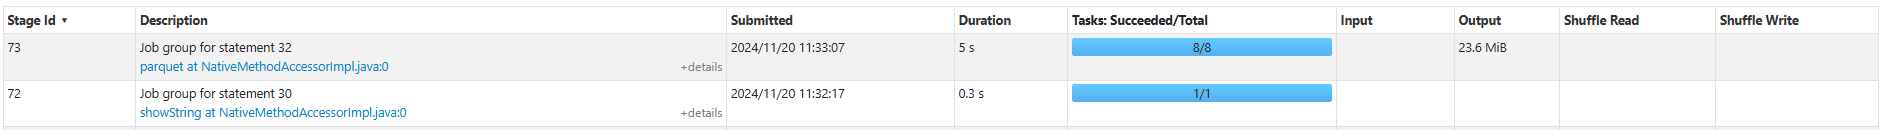

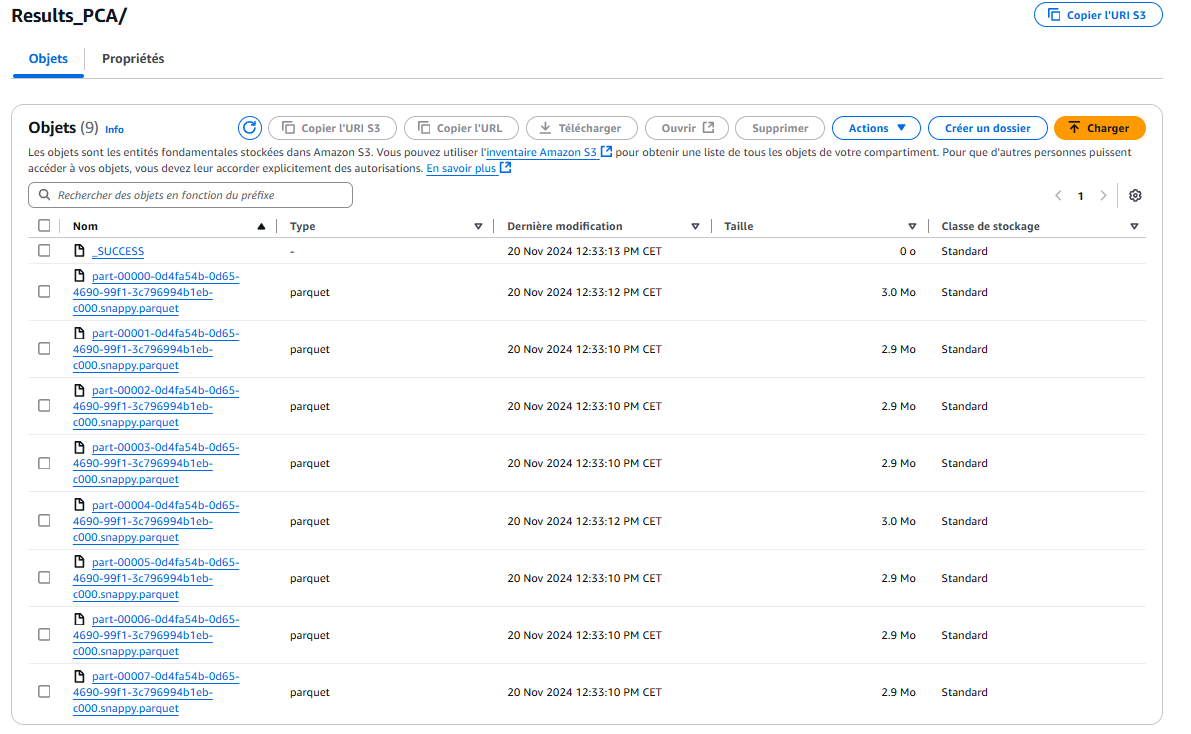

In [30]:
df = pd.read_parquet(PATH_Result_PCA, engine='pyarrow')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                    path  ...                                        pcaFeatures
0          s3://p8-data-billel/Test/Limes 1/r_61_100.jpg  ...  [-0.2840329, -5.925645, -9.611731, -1.1372834,...
1            s3://p8-data-billel/Test/Peach 1/98_100.jpg  ...  [1.973515, -2.181454, -9.214257, -8.75401, 3.9...
2       s3://p8-data-billel/Test/Raspberry 1/224_100.jpg  ...  [-1.4449731, 4.4835744, -0.5703682, -10.288828...
3      s3://p8-data-billel/Test/Grape White 1/r_147_1...  ...  [7.9589567, -4.0034328, -9.308043, 2.4040956, ...
4      s3://p8-data-billel/Test/Pear Kaiser 1/19_100.jpg  ...  [0.09708899, 5.635297, -5.9830785, -4.3176775,...
...                                                  ...  ...                                                ...
11805  s3://p8-data-billel/Test/Apple hit 1/r1_199_10...  ...  [4.0707893, -1.1240737, -9.972697, 2.9023254, ...
11806  s3://p8-data-billel/Test/Pear Monster 1/50_100...  ...  [-0.45616287, -5.452545, -3.42842

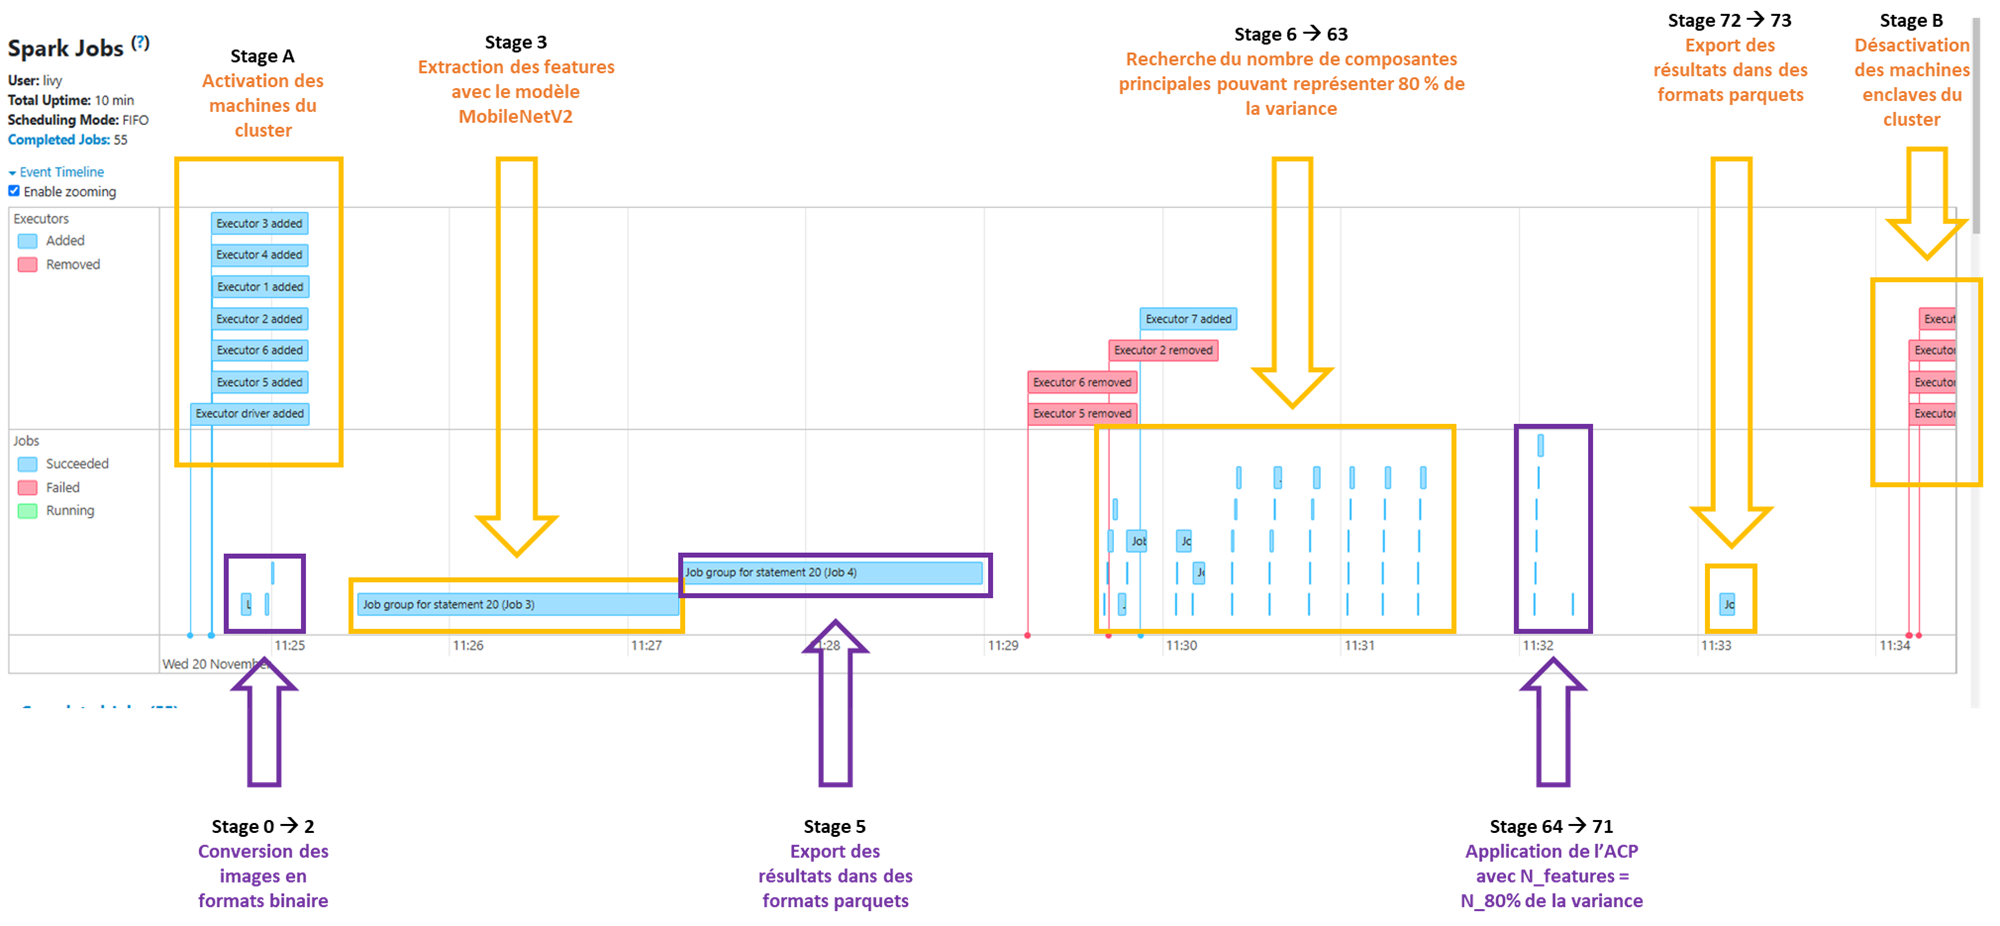

### Conclusion

J'ai mené ce projet en deux étapes : une phase de test local et une migration réussie vers le cloud AWS.

- En local, j'ai installé **Spark** sur une machine virtuelle, validé la solution avec un jeu de données réduit, et utilisé **MobileNetV2** pour son efficacité.
- Sur AWS, j'ai créé un cluster EMR, stocké les données sur **S3**, et exécuté le notebook sur un volume de données important. Le cluster s'est avéré facile à configurer et à redimensionner selon les besoins.

La solution est désormais **scalable, économique et prête** à traiter des charges de données croissantes. 